In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'West Godavari']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
4235,4238,16.61,81.38,West Godavari,Akividu,Akividu,Black Clay,7.66,3.71,0.67,...,3.14,53.18,15.10,12.62,0.024055,0.018218,0.142907,0.073182,-0.035299,Paddy
4236,4239,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.54,2.44,0.55,...,3.79,78.44,9.98,17.40,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4237,4240,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.37,3.55,0.82,...,3.61,87.14,16.42,29.72,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4238,4241,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.21,1.77,0.70,...,2.79,100.70,14.76,26.42,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy
4239,4242,16.61,81.37,West Godavari,Akividu,Akividu,Black Clay,7.66,2.85,0.67,...,4.74,68.50,14.62,24.04,0.023388,0.017978,0.145289,0.072260,-0.034870,Paddy


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
count,313.000000,313.000000,313.00000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,7.047061,1.219904,0.52770,29.210224,159.092652,1400.006390,518.782748,199.571661,1.465879,2.032524,69.261086,7.465208,18.538818,0.086536
std,0.851788,1.209212,0.28375,25.089836,96.045634,822.900136,400.421594,226.740241,1.860245,1.508240,60.967097,6.403115,11.707530,0.090123
min,4.450000,0.010000,0.03000,1.180000,16.000000,86.000000,5.000000,0.810000,0.050000,0.130000,0.070000,0.070000,0.040000,0.021078
25%,6.520000,0.110000,0.26000,11.110000,74.000000,595.000000,111.000000,6.180000,0.580000,0.560000,21.980000,1.130000,10.480000,0.024055
50%,7.240000,1.050000,0.50000,21.340000,133.000000,1410.000000,517.000000,159.000000,0.980000,1.950000,52.560000,6.320000,16.240000,0.029225
75%,7.650000,2.100000,0.76000,40.580000,233.000000,2216.000000,930.000000,342.750000,1.580000,3.210000,99.430000,14.180000,23.470000,0.150362
max,8.700000,5.860000,1.21000,152.440000,611.000000,3969.000000,1171.000000,1505.090000,18.600000,6.440000,314.900000,20.180000,86.660000,0.437469


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black Clay', 'Black Clay ', 'Clay', 'Black', 'Light Broiwn',
       'Red Sandy', 'Red Sandy Loam', 'Brown', 'Red', 'Sandy',
       'Clay Sandy', 'Black ', 'Brown Clay', 'Brown Light', 'Brown ',
       'Light Brown', 'Sandy Loam', 'Broan Clay', 'Red  Sandy',
       'Brown Dark', 'Red Sandy '], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black Clay', 'Black Clay '], 'Black Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Clay'], 'Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Black ', 'Black'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Light Broiwn ', 'Brown Light', 'Light Brown', 'Light Broiwn'], 'Light Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown', 'Brown ', 'Brown Dark'], 'Brown Soil')
df['SoilType'] = df['SoilType'].replace(['Brown Clay', 'Broan Clay'], 'Brown Clay Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'Red  Sandy', 'Red Sandy '], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red Sandy Loam', 'Red Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Clay Sandy', 'Sandy Clay Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace('Red', 'Red Soil')
df['SoilType'] = df['SoilType'].replace('Sandy Loam', 'Sandy Loam Soil')
df.SoilType.unique()

array(['Black Clay Soil', 'Clay Soil', 'Black Soil', 'Light Brown Soil',
       'Red Sandy Soil', 'Red Sandy Loam Soil', 'Brown Soil', 'Red Soil',
       'Sandy Soil', 'Sandy Clay Soil', 'Brown Clay Soil',
       'Sandy Loam Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Clay Soil': 173,
 'Black Soil': 37,
 'Brown Soil': 33,
 'Light Brown Soil': 30,
 'Red Soil': 12,
 'Red Sandy Soil': 7,
 'Clay Soil': 5,
 'Brown Clay Soil': 5,
 'Red Sandy Loam Soil': 5,
 'Sandy Loam Soil': 4,
 'Sandy Clay Soil': 1,
 'Sandy Soil': 1}

<BarContainer object of 12 artists>

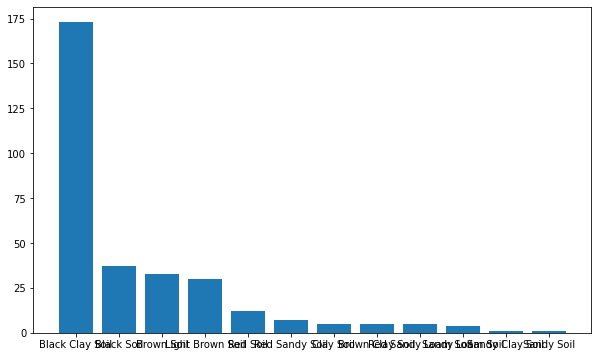

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy ', 'Paddy', 'Maize', 'Groundnut', 'Cashew', 'Oil Palm',
       'Coconut+ Banana', 'Coconut', 'Lime', 'Cocoa+ Coconut',
       'Sugar Cane', 'Mulberry', 'Coconut+Cocoa', 'Cocnut+Banana',
       'Oil Palm+Coconut', 'Mulberrry', 'Coconut+ Cocoa', 'Cane+Lime ',
       'Cocnut+Lime', 'Oil Palm ', 'Tobacco', 'Cane', 'Eucalyptus',
       'Mango', 'Red Sandal', 'Oil Palm+Banana', 'Sandal', 'Cashew+Maize',
       'Banana', 'Brinjal'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy               138
Paddy                47
Maize                44
Oil Palm             37
Lime                  9
Cashew                7
Coconut               5
Cane                  3
Eucalyptus            2
Coconut+ Banana       1
Cane+Lime             1
Cocoa+ Coconut        1
Oil Palm+Banana       1
Oil Palm              1
Groundnut             1
Sandal                1
Sugar Cane            1
Mulberrry             1
Tobacco               1
Cocnut+Banana         1
Brinjal               1
Oil Palm+Coconut      1
Banana                1
Cashew+Maize          1
Coconut+ Cocoa        1
Mulberry              1
Coconut+Cocoa         1
Red Sandal            1
Mango                 1
Cocnut+Lime           1
Name: Crop, dtype: int64

Paddy                         185
Maize                          52
OilPalm + Coconut + Banana     52
SugarCane                      14
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

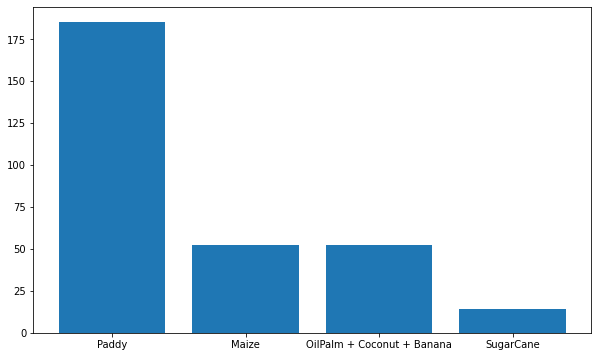

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy ', 'Paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace('Paady', 'Paddy')
df['Crop'] = df['Crop'].replace('Oil Palm', 'OilPalm')
df['Crop'] = df['Crop'].replace(['Coconut', 'Coconut+ Banana', 'Cocoa+ Coconut', 'Coconut+Cocoa', 'Cocnut+Banana', 'Coconut+ Cocoa', 'Cocnut+Lime'], 'Coconut')
df['Crop'] = df['Crop'].replace(['OilPalm', 'Coconut', 'Oil Palm+Coconut', 'Oil Palm ', 'Oil Palm+Banana', 'Banana'], 'OilPalm + Coconut + Banana')
df['Crop'] = df['Crop'].replace(['Cashew', 'Cashew+Maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Cane+Lime ', 'Lime', 'Cane', 'Sugar Cane'], 'SugarCane')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Brinjal') & (df['Crop'] != 'Sandal') & (df['Crop'] != 'Red Sandal') & (df['Crop'] != 'Mango') & (df['Crop'] != 'Eucalyptus') & (df['Crop'] != 'Tobacco') & (df['Crop'] != 'Mulberrry') & (df['Crop'] != 'Mulberry')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI
pH,1.000000,0.265128,-0.007376,0.071154,0.335927,0.330180,0.311368,0.195464,-0.041114,0.325979,-0.184313,0.097448,-0.326562,0.116481
EC,0.265128,1.000000,0.618774,0.531399,0.609634,0.658226,0.773301,0.896447,0.309252,0.843697,0.440366,0.685738,0.032399,0.393708
OC,-0.007376,0.618774,1.000000,0.692562,0.466257,0.619471,0.649804,0.618853,0.517313,0.609047,0.805941,0.809661,0.335071,0.389652
P,0.071154,0.531399,0.692562,1.000000,0.508427,0.381387,0.427702,0.576944,0.414544,0.499417,0.642009,0.584928,0.186620,0.238692
K,0.335927,0.609634,0.466257,0.508427,1.000000,0.577818,0.644379,0.634508,0.180731,0.694782,0.316391,0.596825,0.067216,0.348565
Ca,0.330180,0.658226,0.619471,0.381387,0.577818,1.000000,0.912366,0.650816,0.121050,0.731598,0.381731,0.822074,0.084419,0.577132
Mg,0.311368,0.773301,0.649804,0.427702,0.644379,0.912366,1.000000,0.705222,0.141034,0.853073,0.423422,0.889638,0.079142,0.614561
S,0.195464,0.896447,0.618853,0.576944,0.634508,0.650816,0.705222,1.000000,0.314794,0.795320,0.491456,0.664093,0.102953,0.387463
Zn,-0.041114,0.309252,0.517313,0.414544,0.180731,0.121050,0.141034,0.314794,1.000000,0.228145,0.496443,0.263753,0.128532,-0.028754
B,0.325979,0.843697,0.609047,0.499417,0.694782,0.731598,0.853073,0.795320,0.228145,1.000000,0.454374,0.744184,0.045943,0.457055


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['OC', 'P', 'K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Fe', 'Cu', 'NDVI']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'Mn', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC     Mn  Black Clay Soil  Black Soil  Brown Clay Soil  \
4235  7.66  3.71  12.62                1           0                0   

      Brown Soil  Clay Soil  Light Brown Soil  Red Sandy Loam Soil  \
4235           0          0                 0                    0   

      Red Sandy Soil  Red Soil  Sandy Clay Soil  Sandy Loam Soil  Sandy Soil  
4235               0         0                0                0           0  
4235    Paddy
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:4] = sc1.fit_transform(X[:, 0:4])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8157894736842105


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.54 %
Standard Deviation: 5.01 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8026315789473685


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.07 %
Standard Deviation: 7.60 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8289473684210527


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.13 %
Standard Deviation: 7.11 %


In [36]:
pickle.dump(clf3, open('WG_model.pkl', 'wb'))
pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7763157894736842


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 81.98 %
Standard Deviation: 5.20 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8986784140969163
Testing Accuracy:  0.7894736842105263


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 86.78 %
Standard Deviation: 5.87 %


In [46]:
# pickle.dump(clf5, open('WG_model.pkl', 'wb'))
# pickle.dump(sc1, open('WG_scaler.pkl', 'wb'))

# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.5642402	total: 136ms	remaining: 13.5s
1:	learn: 0.4748144	total: 138ms	remaining: 6.76s
2:	learn: 0.4149018	total: 139ms	remaining: 4.5s
3:	learn: 0.4078797	total: 140ms	remaining: 3.37s
4:	learn: 0.3966994	total: 142ms	remaining: 2.69s
5:	learn: 0.3536222	total: 143ms	remaining: 2.24s
6:	learn: 0.3343769	total: 144ms	remaining: 1.91s
7:	learn: 0.3323360	total: 145ms	remaining: 1.66s
8:	learn: 0.3222810	total: 146ms	remaining: 1.47s
9:	learn: 0.3108441	total: 147ms	remaining: 1.32s
10:	learn: 0.3011107	total: 148ms	remaining: 1.2s
11:	learn: 0.2930370	total: 149ms	remaining: 1.09s
12:	learn: 0.2831532	total: 150ms	remaining: 1s
13:	learn: 0.2812729	total: 151ms	remaining: 928ms
14:	learn: 0.2765490	total: 152ms	remaining: 860ms
15:	learn: 0.2634654	total: 153ms	remaining: 801ms
16:	learn: 0.2602696	total: 154ms	remaining: 749ms
17:	learn: 0.2564392	total: 155ms	remaining: 704ms
18:	learn: 0.2531635	total: 155ms	remaining: 662ms
19:	learn: 0.2475110	total: 156ms	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5164756698
bestIteration = 99

Training on fold [1/5]

bestTest = 0.4445836707
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5317352543
bestIteration = 99

Training on fold [3/5]

bestTest = 0.4853893297
bestIteration = 99

Training on fold [4/5]

bestTest = 0.4131492387
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3383548	test: 1.3379482	best: 1.3379482 (0)	total: 1.15ms	remaining: 1.15s
1:	learn: 1.3008182	test: 1.3019537	best: 1.3019537 (1)	total: 2.32ms	remaining: 1.16s
2:	learn: 1.2610844	test: 1.2614155	best: 1.2614155 (2)	total: 3.31ms	remaining: 1.1s
3:	learn: 1.2237878	test: 1.2220611	best: 1.2220611 (3)	total: 4.01ms	remaining: 999ms
4:	learn: 1.1877383	test: 1.1849552	best: 1.1849552 (4)	total: 4.96ms	remaining: 986ms
5:	learn: 1.1572575	test: 1.1542404	best: 1.1542404 (5)	total: 5.97ms	remaining: 989ms
6:	learn: 1.1259922	test: 1.1206323	best: 1.1206323 (6)	total: 6.49ms	remaining: 921ms
7:	learn: 1.0983492	test: 1.0932453	best: 1.0932453 (7)	total: 7.49ms	remaining: 928ms
8:	learn: 1.0693809	test: 1.0625976	best: 1.0625976 (8)	total: 8.48ms	remaining: 933ms
9:	learn: 1.0402858	test: 1.0339170	best: 1.0339170 (9)	total: 9.61ms	remaining: 952ms
10:	learn: 1.0179353	test: 1.0127783	best: 1.0127783 (10)	total: 10.6ms	remaining: 955ms
11:	learn: 0.9964582	test: 0.9913036	best:

177:	learn: 0.3354528	test: 0.3675487	best: 0.3673315 (176)	total: 172ms	remaining: 795ms
178:	learn: 0.3344930	test: 0.3671580	best: 0.3671580 (178)	total: 173ms	remaining: 795ms
179:	learn: 0.3336267	test: 0.3673681	best: 0.3671580 (178)	total: 174ms	remaining: 794ms
180:	learn: 0.3324678	test: 0.3674401	best: 0.3671580 (178)	total: 175ms	remaining: 794ms
181:	learn: 0.3318241	test: 0.3673616	best: 0.3671580 (178)	total: 176ms	remaining: 793ms
182:	learn: 0.3309055	test: 0.3671545	best: 0.3671545 (182)	total: 177ms	remaining: 792ms
183:	learn: 0.3300337	test: 0.3668145	best: 0.3668145 (183)	total: 179ms	remaining: 792ms
184:	learn: 0.3295189	test: 0.3669794	best: 0.3668145 (183)	total: 180ms	remaining: 791ms
185:	learn: 0.3288865	test: 0.3670958	best: 0.3668145 (183)	total: 181ms	remaining: 790ms
186:	learn: 0.3277185	test: 0.3664090	best: 0.3664090 (186)	total: 181ms	remaining: 789ms
187:	learn: 0.3266953	test: 0.3665723	best: 0.3664090 (186)	total: 182ms	remaining: 788ms
188:	learn

347:	learn: 0.2363712	test: 0.3529180	best: 0.3505336 (312)	total: 342ms	remaining: 641ms
348:	learn: 0.2358840	test: 0.3530559	best: 0.3505336 (312)	total: 343ms	remaining: 641ms
349:	learn: 0.2357629	test: 0.3530706	best: 0.3505336 (312)	total: 345ms	remaining: 640ms
350:	learn: 0.2353187	test: 0.3524472	best: 0.3505336 (312)	total: 346ms	remaining: 639ms
351:	learn: 0.2348292	test: 0.3525940	best: 0.3505336 (312)	total: 347ms	remaining: 639ms
352:	learn: 0.2341860	test: 0.3524440	best: 0.3505336 (312)	total: 348ms	remaining: 638ms
353:	learn: 0.2340248	test: 0.3523830	best: 0.3505336 (312)	total: 349ms	remaining: 637ms
354:	learn: 0.2335959	test: 0.3521313	best: 0.3505336 (312)	total: 350ms	remaining: 636ms
355:	learn: 0.2332993	test: 0.3524829	best: 0.3505336 (312)	total: 351ms	remaining: 635ms
356:	learn: 0.2330818	test: 0.3526422	best: 0.3505336 (312)	total: 352ms	remaining: 634ms
357:	learn: 0.2325202	test: 0.3523620	best: 0.3505336 (312)	total: 353ms	remaining: 633ms
358:	learn

513:	learn: 0.1851324	test: 0.3580374	best: 0.3505336 (312)	total: 517ms	remaining: 489ms
514:	learn: 0.1848350	test: 0.3576366	best: 0.3505336 (312)	total: 518ms	remaining: 488ms
515:	learn: 0.1846127	test: 0.3575527	best: 0.3505336 (312)	total: 520ms	remaining: 487ms
516:	learn: 0.1842024	test: 0.3575096	best: 0.3505336 (312)	total: 521ms	remaining: 486ms
517:	learn: 0.1840821	test: 0.3575454	best: 0.3505336 (312)	total: 522ms	remaining: 485ms
518:	learn: 0.1839783	test: 0.3577804	best: 0.3505336 (312)	total: 523ms	remaining: 484ms
519:	learn: 0.1837631	test: 0.3579731	best: 0.3505336 (312)	total: 524ms	remaining: 483ms
520:	learn: 0.1835611	test: 0.3581820	best: 0.3505336 (312)	total: 525ms	remaining: 482ms
521:	learn: 0.1834244	test: 0.3581128	best: 0.3505336 (312)	total: 526ms	remaining: 481ms
522:	learn: 0.1831432	test: 0.3582761	best: 0.3505336 (312)	total: 527ms	remaining: 480ms
523:	learn: 0.1827526	test: 0.3583771	best: 0.3505336 (312)	total: 528ms	remaining: 479ms
524:	learn

668:	learn: 0.1511371	test: 0.3680253	best: 0.3505336 (312)	total: 684ms	remaining: 338ms
669:	learn: 0.1510121	test: 0.3679654	best: 0.3505336 (312)	total: 685ms	remaining: 337ms
670:	learn: 0.1508603	test: 0.3680080	best: 0.3505336 (312)	total: 686ms	remaining: 336ms
671:	learn: 0.1505852	test: 0.3685430	best: 0.3505336 (312)	total: 687ms	remaining: 335ms
672:	learn: 0.1504802	test: 0.3685681	best: 0.3505336 (312)	total: 688ms	remaining: 334ms
673:	learn: 0.1503603	test: 0.3687050	best: 0.3505336 (312)	total: 689ms	remaining: 333ms
674:	learn: 0.1501397	test: 0.3688352	best: 0.3505336 (312)	total: 690ms	remaining: 332ms
675:	learn: 0.1499484	test: 0.3688188	best: 0.3505336 (312)	total: 691ms	remaining: 331ms
676:	learn: 0.1497934	test: 0.3689407	best: 0.3505336 (312)	total: 692ms	remaining: 330ms
677:	learn: 0.1496747	test: 0.3688630	best: 0.3505336 (312)	total: 693ms	remaining: 329ms
678:	learn: 0.1495667	test: 0.3691304	best: 0.3505336 (312)	total: 694ms	remaining: 328ms
679:	learn

826:	learn: 0.1248885	test: 0.3766005	best: 0.3505336 (312)	total: 851ms	remaining: 178ms
827:	learn: 0.1247141	test: 0.3767872	best: 0.3505336 (312)	total: 852ms	remaining: 177ms
828:	learn: 0.1246579	test: 0.3768148	best: 0.3505336 (312)	total: 853ms	remaining: 176ms
829:	learn: 0.1246112	test: 0.3767145	best: 0.3505336 (312)	total: 854ms	remaining: 175ms
830:	learn: 0.1245126	test: 0.3768213	best: 0.3505336 (312)	total: 855ms	remaining: 174ms
831:	learn: 0.1243176	test: 0.3767318	best: 0.3505336 (312)	total: 856ms	remaining: 173ms
832:	learn: 0.1241489	test: 0.3769726	best: 0.3505336 (312)	total: 858ms	remaining: 172ms
833:	learn: 0.1239929	test: 0.3771014	best: 0.3505336 (312)	total: 859ms	remaining: 171ms
834:	learn: 0.1239129	test: 0.3771248	best: 0.3505336 (312)	total: 860ms	remaining: 170ms
835:	learn: 0.1237822	test: 0.3770641	best: 0.3505336 (312)	total: 861ms	remaining: 169ms
836:	learn: 0.1236578	test: 0.3769668	best: 0.3505336 (312)	total: 862ms	remaining: 168ms
837:	learn

986:	learn: 0.1067331	test: 0.3910244	best: 0.3505336 (312)	total: 1.02s	remaining: 13.5ms
987:	learn: 0.1066627	test: 0.3909214	best: 0.3505336 (312)	total: 1.03s	remaining: 12.5ms
988:	learn: 0.1066101	test: 0.3908966	best: 0.3505336 (312)	total: 1.03s	remaining: 11.4ms
989:	learn: 0.1065118	test: 0.3911495	best: 0.3505336 (312)	total: 1.03s	remaining: 10.4ms
990:	learn: 0.1064027	test: 0.3911135	best: 0.3505336 (312)	total: 1.03s	remaining: 9.35ms
991:	learn: 0.1063451	test: 0.3911911	best: 0.3505336 (312)	total: 1.03s	remaining: 8.31ms
992:	learn: 0.1062151	test: 0.3912196	best: 0.3505336 (312)	total: 1.03s	remaining: 7.28ms
993:	learn: 0.1061160	test: 0.3914867	best: 0.3505336 (312)	total: 1.03s	remaining: 6.24ms
994:	learn: 0.1060071	test: 0.3913007	best: 0.3505336 (312)	total: 1.03s	remaining: 5.2ms
995:	learn: 0.1059078	test: 0.3916853	best: 0.3505336 (312)	total: 1.03s	remaining: 4.16ms
996:	learn: 0.1058222	test: 0.3916790	best: 0.3505336 (312)	total: 1.04s	remaining: 3.12ms


147:	learn: 0.1833016	test: 0.3767145	best: 0.3579899 (61)	total: 150ms	remaining: 864ms
148:	learn: 0.1823162	test: 0.3765827	best: 0.3579899 (61)	total: 151ms	remaining: 864ms
149:	learn: 0.1813247	test: 0.3774497	best: 0.3579899 (61)	total: 152ms	remaining: 863ms
150:	learn: 0.1808075	test: 0.3776130	best: 0.3579899 (61)	total: 153ms	remaining: 862ms
151:	learn: 0.1802938	test: 0.3777837	best: 0.3579899 (61)	total: 154ms	remaining: 861ms
152:	learn: 0.1797645	test: 0.3771357	best: 0.3579899 (61)	total: 155ms	remaining: 860ms
153:	learn: 0.1787408	test: 0.3766204	best: 0.3579899 (61)	total: 156ms	remaining: 859ms
154:	learn: 0.1783474	test: 0.3767039	best: 0.3579899 (61)	total: 157ms	remaining: 858ms
155:	learn: 0.1778607	test: 0.3767246	best: 0.3579899 (61)	total: 158ms	remaining: 857ms
156:	learn: 0.1769737	test: 0.3760138	best: 0.3579899 (61)	total: 159ms	remaining: 856ms
157:	learn: 0.1758073	test: 0.3773901	best: 0.3579899 (61)	total: 160ms	remaining: 855ms
158:	learn: 0.1750666

319:	learn: 0.0969215	test: 0.4146815	best: 0.3579899 (61)	total: 326ms	remaining: 694ms
320:	learn: 0.0965127	test: 0.4140850	best: 0.3579899 (61)	total: 328ms	remaining: 693ms
321:	learn: 0.0962506	test: 0.4141885	best: 0.3579899 (61)	total: 328ms	remaining: 692ms
322:	learn: 0.0960042	test: 0.4146307	best: 0.3579899 (61)	total: 329ms	remaining: 691ms
323:	learn: 0.0954658	test: 0.4157900	best: 0.3579899 (61)	total: 330ms	remaining: 689ms
324:	learn: 0.0949992	test: 0.4158050	best: 0.3579899 (61)	total: 331ms	remaining: 688ms
325:	learn: 0.0948300	test: 0.4164442	best: 0.3579899 (61)	total: 332ms	remaining: 687ms
326:	learn: 0.0944114	test: 0.4164282	best: 0.3579899 (61)	total: 333ms	remaining: 686ms
327:	learn: 0.0939112	test: 0.4172854	best: 0.3579899 (61)	total: 334ms	remaining: 685ms
328:	learn: 0.0936823	test: 0.4176620	best: 0.3579899 (61)	total: 335ms	remaining: 684ms
329:	learn: 0.0933689	test: 0.4176196	best: 0.3579899 (61)	total: 336ms	remaining: 683ms
330:	learn: 0.0929974

487:	learn: 0.0617035	test: 0.4528761	best: 0.3579899 (61)	total: 495ms	remaining: 519ms
488:	learn: 0.0614853	test: 0.4537693	best: 0.3579899 (61)	total: 496ms	remaining: 519ms
489:	learn: 0.0612754	test: 0.4546081	best: 0.3579899 (61)	total: 497ms	remaining: 518ms
490:	learn: 0.0611997	test: 0.4548000	best: 0.3579899 (61)	total: 499ms	remaining: 517ms
491:	learn: 0.0610836	test: 0.4547291	best: 0.3579899 (61)	total: 500ms	remaining: 516ms
492:	learn: 0.0609770	test: 0.4548906	best: 0.3579899 (61)	total: 501ms	remaining: 515ms
493:	learn: 0.0608950	test: 0.4552120	best: 0.3579899 (61)	total: 502ms	remaining: 514ms
494:	learn: 0.0607224	test: 0.4549958	best: 0.3579899 (61)	total: 503ms	remaining: 513ms
495:	learn: 0.0605036	test: 0.4547251	best: 0.3579899 (61)	total: 504ms	remaining: 512ms
496:	learn: 0.0603505	test: 0.4549132	best: 0.3579899 (61)	total: 505ms	remaining: 511ms
497:	learn: 0.0601635	test: 0.4554651	best: 0.3579899 (61)	total: 506ms	remaining: 510ms
498:	learn: 0.0600224

660:	learn: 0.0433605	test: 0.4864129	best: 0.3579899 (61)	total: 665ms	remaining: 341ms
661:	learn: 0.0433050	test: 0.4865481	best: 0.3579899 (61)	total: 666ms	remaining: 340ms
662:	learn: 0.0432656	test: 0.4867477	best: 0.3579899 (61)	total: 667ms	remaining: 339ms
663:	learn: 0.0431265	test: 0.4869374	best: 0.3579899 (61)	total: 668ms	remaining: 338ms
664:	learn: 0.0430804	test: 0.4872737	best: 0.3579899 (61)	total: 669ms	remaining: 337ms
665:	learn: 0.0430055	test: 0.4878466	best: 0.3579899 (61)	total: 670ms	remaining: 336ms
666:	learn: 0.0428985	test: 0.4878422	best: 0.3579899 (61)	total: 671ms	remaining: 335ms
667:	learn: 0.0428458	test: 0.4882169	best: 0.3579899 (61)	total: 672ms	remaining: 334ms
668:	learn: 0.0427989	test: 0.4883629	best: 0.3579899 (61)	total: 673ms	remaining: 333ms
669:	learn: 0.0427059	test: 0.4886363	best: 0.3579899 (61)	total: 674ms	remaining: 332ms
670:	learn: 0.0426105	test: 0.4886904	best: 0.3579899 (61)	total: 675ms	remaining: 331ms
671:	learn: 0.0424932

825:	learn: 0.0329843	test: 0.5118103	best: 0.3579899 (61)	total: 844ms	remaining: 178ms
826:	learn: 0.0329661	test: 0.5118751	best: 0.3579899 (61)	total: 845ms	remaining: 177ms
827:	learn: 0.0329511	test: 0.5120636	best: 0.3579899 (61)	total: 847ms	remaining: 176ms
828:	learn: 0.0329199	test: 0.5121821	best: 0.3579899 (61)	total: 848ms	remaining: 175ms
829:	learn: 0.0328568	test: 0.5121789	best: 0.3579899 (61)	total: 849ms	remaining: 174ms
830:	learn: 0.0327963	test: 0.5125645	best: 0.3579899 (61)	total: 850ms	remaining: 173ms
831:	learn: 0.0327296	test: 0.5132395	best: 0.3579899 (61)	total: 851ms	remaining: 172ms
832:	learn: 0.0327041	test: 0.5133758	best: 0.3579899 (61)	total: 852ms	remaining: 171ms
833:	learn: 0.0326597	test: 0.5133642	best: 0.3579899 (61)	total: 853ms	remaining: 170ms
834:	learn: 0.0326278	test: 0.5137834	best: 0.3579899 (61)	total: 854ms	remaining: 169ms
835:	learn: 0.0326048	test: 0.5138022	best: 0.3579899 (61)	total: 855ms	remaining: 168ms
836:	learn: 0.0325646

993:	learn: 0.0267682	test: 0.5390773	best: 0.3579899 (61)	total: 1.01s	remaining: 6.11ms
994:	learn: 0.0267412	test: 0.5391877	best: 0.3579899 (61)	total: 1.01s	remaining: 5.09ms
995:	learn: 0.0266529	test: 0.5394362	best: 0.3579899 (61)	total: 1.01s	remaining: 4.07ms
996:	learn: 0.0266397	test: 0.5395797	best: 0.3579899 (61)	total: 1.01s	remaining: 3.06ms
997:	learn: 0.0266242	test: 0.5394476	best: 0.3579899 (61)	total: 1.02s	remaining: 2.04ms
998:	learn: 0.0265772	test: 0.5401578	best: 0.3579899 (61)	total: 1.02s	remaining: 1.02ms
999:	learn: 0.0265264	test: 0.5406616	best: 0.3579899 (61)	total: 1.02s	remaining: 0us

bestTest = 0.3579899256
bestIteration = 61

1:	loss: 0.3579899	best: 0.3505336 (0)	total: 2.27s	remaining: 4.54s
0:	learn: 1.3425907	test: 1.3438565	best: 1.3438565 (0)	total: 2.73ms	remaining: 2.73s
1:	learn: 1.3083507	test: 1.3098312	best: 1.3098312 (1)	total: 5.23ms	remaining: 2.61s
2:	learn: 1.2755068	test: 1.2766897	best: 1.2766897 (2)	total: 7.67ms	remaining: 2.55

149:	learn: 0.3258126	test: 0.3920806	best: 0.3920806 (149)	total: 358ms	remaining: 2.03s
150:	learn: 0.3244621	test: 0.3913610	best: 0.3913610 (150)	total: 360ms	remaining: 2.03s
151:	learn: 0.3229061	test: 0.3904889	best: 0.3904889 (151)	total: 363ms	remaining: 2.02s
152:	learn: 0.3217351	test: 0.3897832	best: 0.3897832 (152)	total: 365ms	remaining: 2.02s
153:	learn: 0.3206324	test: 0.3895018	best: 0.3895018 (153)	total: 368ms	remaining: 2.02s
154:	learn: 0.3195579	test: 0.3891382	best: 0.3891382 (154)	total: 371ms	remaining: 2.02s
155:	learn: 0.3186386	test: 0.3891058	best: 0.3891058 (155)	total: 375ms	remaining: 2.03s
156:	learn: 0.3172255	test: 0.3881421	best: 0.3881421 (156)	total: 378ms	remaining: 2.03s
157:	learn: 0.3162430	test: 0.3873699	best: 0.3873699 (157)	total: 381ms	remaining: 2.03s
158:	learn: 0.3152998	test: 0.3871064	best: 0.3871064 (158)	total: 383ms	remaining: 2.03s
159:	learn: 0.3138035	test: 0.3862301	best: 0.3862301 (159)	total: 386ms	remaining: 2.02s
160:	learn

289:	learn: 0.2079340	test: 0.3692223	best: 0.3681948 (285)	total: 709ms	remaining: 1.73s
290:	learn: 0.2071635	test: 0.3692220	best: 0.3681948 (285)	total: 712ms	remaining: 1.73s
291:	learn: 0.2063323	test: 0.3686023	best: 0.3681948 (285)	total: 714ms	remaining: 1.73s
292:	learn: 0.2058297	test: 0.3684652	best: 0.3681948 (285)	total: 717ms	remaining: 1.73s
293:	learn: 0.2052040	test: 0.3682365	best: 0.3681948 (285)	total: 721ms	remaining: 1.73s
294:	learn: 0.2048435	test: 0.3682848	best: 0.3681948 (285)	total: 724ms	remaining: 1.73s
295:	learn: 0.2045518	test: 0.3681128	best: 0.3681128 (295)	total: 727ms	remaining: 1.73s
296:	learn: 0.2039603	test: 0.3676929	best: 0.3676929 (296)	total: 731ms	remaining: 1.73s
297:	learn: 0.2036441	test: 0.3678136	best: 0.3676929 (296)	total: 733ms	remaining: 1.73s
298:	learn: 0.2028951	test: 0.3674907	best: 0.3674907 (298)	total: 736ms	remaining: 1.73s
299:	learn: 0.2023518	test: 0.3676232	best: 0.3674907 (298)	total: 739ms	remaining: 1.72s
300:	learn

428:	learn: 0.1471823	test: 0.3679898	best: 0.3645654 (346)	total: 1.07s	remaining: 1.43s
429:	learn: 0.1467791	test: 0.3679645	best: 0.3645654 (346)	total: 1.08s	remaining: 1.43s
430:	learn: 0.1465048	test: 0.3679428	best: 0.3645654 (346)	total: 1.08s	remaining: 1.43s
431:	learn: 0.1462064	test: 0.3680401	best: 0.3645654 (346)	total: 1.08s	remaining: 1.42s
432:	learn: 0.1458613	test: 0.3685263	best: 0.3645654 (346)	total: 1.08s	remaining: 1.42s
433:	learn: 0.1455253	test: 0.3686241	best: 0.3645654 (346)	total: 1.09s	remaining: 1.42s
434:	learn: 0.1451229	test: 0.3688367	best: 0.3645654 (346)	total: 1.09s	remaining: 1.42s
435:	learn: 0.1448976	test: 0.3690264	best: 0.3645654 (346)	total: 1.09s	remaining: 1.41s
436:	learn: 0.1445954	test: 0.3692205	best: 0.3645654 (346)	total: 1.09s	remaining: 1.41s
437:	learn: 0.1442242	test: 0.3692220	best: 0.3645654 (346)	total: 1.1s	remaining: 1.41s
438:	learn: 0.1438769	test: 0.3691011	best: 0.3645654 (346)	total: 1.1s	remaining: 1.41s
439:	learn: 

557:	learn: 0.1133007	test: 0.3762551	best: 0.3645654 (346)	total: 1.43s	remaining: 1.13s
558:	learn: 0.1130682	test: 0.3763514	best: 0.3645654 (346)	total: 1.44s	remaining: 1.13s
559:	learn: 0.1128469	test: 0.3763233	best: 0.3645654 (346)	total: 1.44s	remaining: 1.13s
560:	learn: 0.1125951	test: 0.3764142	best: 0.3645654 (346)	total: 1.44s	remaining: 1.13s
561:	learn: 0.1124019	test: 0.3766549	best: 0.3645654 (346)	total: 1.44s	remaining: 1.13s
562:	learn: 0.1119359	test: 0.3766316	best: 0.3645654 (346)	total: 1.45s	remaining: 1.12s
563:	learn: 0.1116533	test: 0.3768547	best: 0.3645654 (346)	total: 1.45s	remaining: 1.12s
564:	learn: 0.1115276	test: 0.3769015	best: 0.3645654 (346)	total: 1.45s	remaining: 1.12s
565:	learn: 0.1113709	test: 0.3770984	best: 0.3645654 (346)	total: 1.46s	remaining: 1.12s
566:	learn: 0.1111873	test: 0.3771948	best: 0.3645654 (346)	total: 1.46s	remaining: 1.11s
567:	learn: 0.1110272	test: 0.3772597	best: 0.3645654 (346)	total: 1.46s	remaining: 1.11s
568:	learn

689:	learn: 0.0899717	test: 0.3903757	best: 0.3645654 (346)	total: 1.78s	remaining: 802ms
690:	learn: 0.0898407	test: 0.3904483	best: 0.3645654 (346)	total: 1.79s	remaining: 800ms
691:	learn: 0.0897199	test: 0.3904488	best: 0.3645654 (346)	total: 1.79s	remaining: 797ms
692:	learn: 0.0895065	test: 0.3907283	best: 0.3645654 (346)	total: 1.79s	remaining: 795ms
693:	learn: 0.0893134	test: 0.3909438	best: 0.3645654 (346)	total: 1.8s	remaining: 792ms
694:	learn: 0.0891060	test: 0.3907688	best: 0.3645654 (346)	total: 1.8s	remaining: 790ms
695:	learn: 0.0890276	test: 0.3910244	best: 0.3645654 (346)	total: 1.8s	remaining: 787ms
696:	learn: 0.0888862	test: 0.3911066	best: 0.3645654 (346)	total: 1.8s	remaining: 785ms
697:	learn: 0.0886667	test: 0.3912618	best: 0.3645654 (346)	total: 1.81s	remaining: 782ms
698:	learn: 0.0884972	test: 0.3916382	best: 0.3645654 (346)	total: 1.81s	remaining: 781ms
699:	learn: 0.0883372	test: 0.3915114	best: 0.3645654 (346)	total: 1.82s	remaining: 778ms
700:	learn: 0.

825:	learn: 0.0731706	test: 0.4004376	best: 0.3645654 (346)	total: 2.15s	remaining: 452ms
826:	learn: 0.0731043	test: 0.4005753	best: 0.3645654 (346)	total: 2.15s	remaining: 450ms
827:	learn: 0.0729645	test: 0.4005360	best: 0.3645654 (346)	total: 2.15s	remaining: 447ms
828:	learn: 0.0728625	test: 0.4007738	best: 0.3645654 (346)	total: 2.15s	remaining: 445ms
829:	learn: 0.0727573	test: 0.4011800	best: 0.3645654 (346)	total: 2.16s	remaining: 442ms
830:	learn: 0.0726756	test: 0.4012742	best: 0.3645654 (346)	total: 2.16s	remaining: 440ms
831:	learn: 0.0726310	test: 0.4013284	best: 0.3645654 (346)	total: 2.16s	remaining: 437ms
832:	learn: 0.0725279	test: 0.4012954	best: 0.3645654 (346)	total: 2.17s	remaining: 435ms
833:	learn: 0.0724253	test: 0.4012553	best: 0.3645654 (346)	total: 2.17s	remaining: 432ms
834:	learn: 0.0723451	test: 0.4013622	best: 0.3645654 (346)	total: 2.17s	remaining: 429ms
835:	learn: 0.0722612	test: 0.4014487	best: 0.3645654 (346)	total: 2.17s	remaining: 427ms
836:	learn

960:	learn: 0.0617199	test: 0.4112908	best: 0.3645654 (346)	total: 2.5s	remaining: 102ms
961:	learn: 0.0616376	test: 0.4116397	best: 0.3645654 (346)	total: 2.5s	remaining: 99ms
962:	learn: 0.0615850	test: 0.4115709	best: 0.3645654 (346)	total: 2.51s	remaining: 96.4ms
963:	learn: 0.0615156	test: 0.4118158	best: 0.3645654 (346)	total: 2.51s	remaining: 93.8ms
964:	learn: 0.0614390	test: 0.4120105	best: 0.3645654 (346)	total: 2.51s	remaining: 91.2ms
965:	learn: 0.0613530	test: 0.4117885	best: 0.3645654 (346)	total: 2.52s	remaining: 88.6ms
966:	learn: 0.0612550	test: 0.4119243	best: 0.3645654 (346)	total: 2.52s	remaining: 86ms
967:	learn: 0.0611787	test: 0.4119233	best: 0.3645654 (346)	total: 2.52s	remaining: 83.4ms
968:	learn: 0.0611217	test: 0.4119728	best: 0.3645654 (346)	total: 2.52s	remaining: 80.8ms
969:	learn: 0.0610504	test: 0.4121306	best: 0.3645654 (346)	total: 2.53s	remaining: 78.2ms
970:	learn: 0.0609302	test: 0.4122504	best: 0.3645654 (346)	total: 2.53s	remaining: 75.6ms
971:	l

95:	learn: 0.1836189	test: 0.3548917	best: 0.3548917 (95)	total: 250ms	remaining: 2.35s
96:	learn: 0.1819536	test: 0.3555465	best: 0.3548917 (95)	total: 253ms	remaining: 2.35s
97:	learn: 0.1805696	test: 0.3565638	best: 0.3548917 (95)	total: 256ms	remaining: 2.35s
98:	learn: 0.1789914	test: 0.3577088	best: 0.3548917 (95)	total: 258ms	remaining: 2.35s
99:	learn: 0.1774148	test: 0.3576636	best: 0.3548917 (95)	total: 261ms	remaining: 2.35s
100:	learn: 0.1760513	test: 0.3573586	best: 0.3548917 (95)	total: 264ms	remaining: 2.35s
101:	learn: 0.1746621	test: 0.3588336	best: 0.3548917 (95)	total: 267ms	remaining: 2.35s
102:	learn: 0.1734697	test: 0.3587937	best: 0.3548917 (95)	total: 270ms	remaining: 2.35s
103:	learn: 0.1716630	test: 0.3583247	best: 0.3548917 (95)	total: 273ms	remaining: 2.35s
104:	learn: 0.1709999	test: 0.3583858	best: 0.3548917 (95)	total: 276ms	remaining: 2.35s
105:	learn: 0.1691353	test: 0.3577322	best: 0.3548917 (95)	total: 278ms	remaining: 2.35s
106:	learn: 0.1680612	test

228:	learn: 0.0794875	test: 0.3786887	best: 0.3548917 (95)	total: 612ms	remaining: 2.06s
229:	learn: 0.0791907	test: 0.3789799	best: 0.3548917 (95)	total: 615ms	remaining: 2.06s
230:	learn: 0.0787259	test: 0.3794603	best: 0.3548917 (95)	total: 618ms	remaining: 2.06s
231:	learn: 0.0782971	test: 0.3799948	best: 0.3548917 (95)	total: 620ms	remaining: 2.05s
232:	learn: 0.0778756	test: 0.3803558	best: 0.3548917 (95)	total: 623ms	remaining: 2.05s
233:	learn: 0.0774519	test: 0.3796618	best: 0.3548917 (95)	total: 626ms	remaining: 2.05s
234:	learn: 0.0770503	test: 0.3804230	best: 0.3548917 (95)	total: 629ms	remaining: 2.05s
235:	learn: 0.0767896	test: 0.3805488	best: 0.3548917 (95)	total: 632ms	remaining: 2.05s
236:	learn: 0.0764360	test: 0.3810078	best: 0.3548917 (95)	total: 635ms	remaining: 2.04s
237:	learn: 0.0760735	test: 0.3809350	best: 0.3548917 (95)	total: 637ms	remaining: 2.04s
238:	learn: 0.0756923	test: 0.3813637	best: 0.3548917 (95)	total: 640ms	remaining: 2.04s
239:	learn: 0.0752981

360:	learn: 0.0467062	test: 0.4076424	best: 0.3548917 (95)	total: 962ms	remaining: 1.7s
361:	learn: 0.0465935	test: 0.4078759	best: 0.3548917 (95)	total: 965ms	remaining: 1.7s
362:	learn: 0.0464720	test: 0.4079908	best: 0.3548917 (95)	total: 967ms	remaining: 1.7s
363:	learn: 0.0463476	test: 0.4080549	best: 0.3548917 (95)	total: 970ms	remaining: 1.69s
364:	learn: 0.0462139	test: 0.4080731	best: 0.3548917 (95)	total: 973ms	remaining: 1.69s
365:	learn: 0.0460388	test: 0.4081833	best: 0.3548917 (95)	total: 976ms	remaining: 1.69s
366:	learn: 0.0458642	test: 0.4092288	best: 0.3548917 (95)	total: 979ms	remaining: 1.69s
367:	learn: 0.0456748	test: 0.4098744	best: 0.3548917 (95)	total: 982ms	remaining: 1.69s
368:	learn: 0.0453850	test: 0.4105427	best: 0.3548917 (95)	total: 985ms	remaining: 1.68s
369:	learn: 0.0452971	test: 0.4109312	best: 0.3548917 (95)	total: 988ms	remaining: 1.68s
370:	learn: 0.0451485	test: 0.4112521	best: 0.3548917 (95)	total: 991ms	remaining: 1.68s
371:	learn: 0.0450684	te

498:	learn: 0.0320479	test: 0.4291026	best: 0.3548917 (95)	total: 1.33s	remaining: 1.33s
499:	learn: 0.0319802	test: 0.4294076	best: 0.3548917 (95)	total: 1.33s	remaining: 1.33s
500:	learn: 0.0318630	test: 0.4298799	best: 0.3548917 (95)	total: 1.33s	remaining: 1.33s
501:	learn: 0.0317872	test: 0.4299902	best: 0.3548917 (95)	total: 1.34s	remaining: 1.33s
502:	learn: 0.0317707	test: 0.4299719	best: 0.3548917 (95)	total: 1.34s	remaining: 1.32s
503:	learn: 0.0316804	test: 0.4301645	best: 0.3548917 (95)	total: 1.34s	remaining: 1.32s
504:	learn: 0.0316208	test: 0.4299352	best: 0.3548917 (95)	total: 1.34s	remaining: 1.32s
505:	learn: 0.0315273	test: 0.4305403	best: 0.3548917 (95)	total: 1.35s	remaining: 1.32s
506:	learn: 0.0314495	test: 0.4310128	best: 0.3548917 (95)	total: 1.35s	remaining: 1.31s
507:	learn: 0.0313759	test: 0.4311088	best: 0.3548917 (95)	total: 1.35s	remaining: 1.31s
508:	learn: 0.0313046	test: 0.4314305	best: 0.3548917 (95)	total: 1.36s	remaining: 1.31s
509:	learn: 0.0312441

631:	learn: 0.0243788	test: 0.4493493	best: 0.3548917 (95)	total: 1.68s	remaining: 977ms
632:	learn: 0.0243434	test: 0.4493998	best: 0.3548917 (95)	total: 1.68s	remaining: 975ms
633:	learn: 0.0242930	test: 0.4499706	best: 0.3548917 (95)	total: 1.68s	remaining: 972ms
634:	learn: 0.0242205	test: 0.4500928	best: 0.3548917 (95)	total: 1.69s	remaining: 969ms
635:	learn: 0.0241706	test: 0.4500929	best: 0.3548917 (95)	total: 1.69s	remaining: 967ms
636:	learn: 0.0241200	test: 0.4504689	best: 0.3548917 (95)	total: 1.69s	remaining: 964ms
637:	learn: 0.0240727	test: 0.4508399	best: 0.3548917 (95)	total: 1.7s	remaining: 962ms
638:	learn: 0.0240282	test: 0.4507316	best: 0.3548917 (95)	total: 1.7s	remaining: 959ms
639:	learn: 0.0239848	test: 0.4509599	best: 0.3548917 (95)	total: 1.7s	remaining: 957ms
640:	learn: 0.0239547	test: 0.4509530	best: 0.3548917 (95)	total: 1.7s	remaining: 954ms
641:	learn: 0.0238978	test: 0.4512248	best: 0.3548917 (95)	total: 1.71s	remaining: 951ms
642:	learn: 0.0238597	tes

769:	learn: 0.0192298	test: 0.4720969	best: 0.3548917 (95)	total: 2.04s	remaining: 610ms
770:	learn: 0.0192045	test: 0.4721052	best: 0.3548917 (95)	total: 2.05s	remaining: 608ms
771:	learn: 0.0191707	test: 0.4722098	best: 0.3548917 (95)	total: 2.05s	remaining: 605ms
772:	learn: 0.0191408	test: 0.4725313	best: 0.3548917 (95)	total: 2.05s	remaining: 603ms
773:	learn: 0.0191236	test: 0.4725771	best: 0.3548917 (95)	total: 2.06s	remaining: 600ms
774:	learn: 0.0190892	test: 0.4727304	best: 0.3548917 (95)	total: 2.06s	remaining: 597ms
775:	learn: 0.0190584	test: 0.4729231	best: 0.3548917 (95)	total: 2.06s	remaining: 595ms
776:	learn: 0.0190297	test: 0.4729918	best: 0.3548917 (95)	total: 2.06s	remaining: 592ms
777:	learn: 0.0189967	test: 0.4730271	best: 0.3548917 (95)	total: 2.07s	remaining: 590ms
778:	learn: 0.0189733	test: 0.4732738	best: 0.3548917 (95)	total: 2.07s	remaining: 587ms
779:	learn: 0.0189487	test: 0.4734298	best: 0.3548917 (95)	total: 2.07s	remaining: 584ms
780:	learn: 0.0189226

899:	learn: 0.0158494	test: 0.4866257	best: 0.3548917 (95)	total: 2.39s	remaining: 266ms
900:	learn: 0.0158275	test: 0.4866087	best: 0.3548917 (95)	total: 2.4s	remaining: 263ms
901:	learn: 0.0158094	test: 0.4865391	best: 0.3548917 (95)	total: 2.4s	remaining: 261ms
902:	learn: 0.0157814	test: 0.4865974	best: 0.3548917 (95)	total: 2.4s	remaining: 258ms
903:	learn: 0.0157671	test: 0.4867639	best: 0.3548917 (95)	total: 2.4s	remaining: 255ms
904:	learn: 0.0157457	test: 0.4870253	best: 0.3548917 (95)	total: 2.4s	remaining: 253ms
905:	learn: 0.0157271	test: 0.4872849	best: 0.3548917 (95)	total: 2.41s	remaining: 250ms
906:	learn: 0.0157146	test: 0.4874392	best: 0.3548917 (95)	total: 2.41s	remaining: 247ms
907:	learn: 0.0156997	test: 0.4873726	best: 0.3548917 (95)	total: 2.41s	remaining: 245ms
908:	learn: 0.0156789	test: 0.4874880	best: 0.3548917 (95)	total: 2.42s	remaining: 242ms
909:	learn: 0.0156542	test: 0.4877856	best: 0.3548917 (95)	total: 2.42s	remaining: 239ms
910:	learn: 0.0156361	test

2:	learn: 1.2898786	test: 1.2986395	best: 1.2986395 (2)	total: 125ms	remaining: 41.5s
3:	learn: 1.2622529	test: 1.2735066	best: 1.2735066 (3)	total: 169ms	remaining: 42.1s
4:	learn: 1.2255566	test: 1.2363786	best: 1.2363786 (4)	total: 170ms	remaining: 33.8s
5:	learn: 1.2003345	test: 1.2138524	best: 1.2138524 (5)	total: 173ms	remaining: 28.6s
6:	learn: 1.1855026	test: 1.2002364	best: 1.2002364 (6)	total: 212ms	remaining: 30.1s
7:	learn: 1.1647496	test: 1.1810886	best: 1.1810886 (7)	total: 253ms	remaining: 31.3s
8:	learn: 1.1389634	test: 1.1579539	best: 1.1579539 (8)	total: 293ms	remaining: 32.2s
9:	learn: 1.1083036	test: 1.1254217	best: 1.1254217 (9)	total: 294ms	remaining: 29.1s
10:	learn: 1.0901512	test: 1.1077196	best: 1.1077196 (10)	total: 335ms	remaining: 30.1s
11:	learn: 1.0624375	test: 1.0793366	best: 1.0793366 (11)	total: 335ms	remaining: 27.6s
12:	learn: 1.0426264	test: 1.0640287	best: 1.0640287 (12)	total: 356ms	remaining: 27s
13:	learn: 1.0239740	test: 1.0481583	best: 1.04815

99:	learn: 0.4107735	test: 0.5123423	best: 0.5123423 (99)	total: 3.59s	remaining: 32.3s
100:	learn: 0.4076568	test: 0.5095662	best: 0.5095662 (100)	total: 3.59s	remaining: 32s
101:	learn: 0.4048341	test: 0.5082188	best: 0.5082188 (101)	total: 3.63s	remaining: 32s
102:	learn: 0.4025046	test: 0.5071916	best: 0.5071916 (102)	total: 3.68s	remaining: 32.1s
103:	learn: 0.4001713	test: 0.5056469	best: 0.5056469 (103)	total: 3.73s	remaining: 32.1s
104:	learn: 0.3975797	test: 0.5042723	best: 0.5042723 (104)	total: 3.77s	remaining: 32.1s
105:	learn: 0.3952353	test: 0.5025985	best: 0.5025985 (105)	total: 3.81s	remaining: 32.2s
106:	learn: 0.3922740	test: 0.5003009	best: 0.5003009 (106)	total: 3.86s	remaining: 32.2s
107:	learn: 0.3900672	test: 0.4992751	best: 0.4992751 (107)	total: 3.9s	remaining: 32.2s
108:	learn: 0.3874283	test: 0.4975707	best: 0.4975707 (108)	total: 3.94s	remaining: 32.2s
109:	learn: 0.3848442	test: 0.4952204	best: 0.4952204 (109)	total: 3.98s	remaining: 32.2s
110:	learn: 0.381

194:	learn: 0.2495379	test: 0.4127725	best: 0.4127725 (194)	total: 7.1s	remaining: 29.3s
195:	learn: 0.2483164	test: 0.4118894	best: 0.4118894 (195)	total: 7.14s	remaining: 29.3s
196:	learn: 0.2470220	test: 0.4114827	best: 0.4114827 (196)	total: 7.18s	remaining: 29.3s
197:	learn: 0.2460469	test: 0.4109542	best: 0.4109542 (197)	total: 7.22s	remaining: 29.3s
198:	learn: 0.2447517	test: 0.4102575	best: 0.4102575 (198)	total: 7.26s	remaining: 29.2s
199:	learn: 0.2437805	test: 0.4095015	best: 0.4095015 (199)	total: 7.3s	remaining: 29.2s
200:	learn: 0.2426887	test: 0.4092544	best: 0.4092544 (200)	total: 7.35s	remaining: 29.2s
201:	learn: 0.2418230	test: 0.4090111	best: 0.4090111 (201)	total: 7.39s	remaining: 29.2s
202:	learn: 0.2408200	test: 0.4082935	best: 0.4082935 (202)	total: 7.43s	remaining: 29.2s
203:	learn: 0.2398412	test: 0.4076337	best: 0.4076337 (203)	total: 7.47s	remaining: 29.1s
204:	learn: 0.2387137	test: 0.4068257	best: 0.4068257 (204)	total: 7.5s	remaining: 29.1s
205:	learn: 0

286:	learn: 0.1702961	test: 0.3901119	best: 0.3901119 (286)	total: 10.7s	remaining: 26.6s
287:	learn: 0.1696005	test: 0.3899380	best: 0.3899380 (287)	total: 10.8s	remaining: 26.6s
288:	learn: 0.1689252	test: 0.3893432	best: 0.3893432 (288)	total: 10.8s	remaining: 26.6s
289:	learn: 0.1682897	test: 0.3893700	best: 0.3893432 (288)	total: 10.8s	remaining: 26.5s
290:	learn: 0.1676001	test: 0.3895270	best: 0.3893432 (288)	total: 10.9s	remaining: 26.5s
291:	learn: 0.1669066	test: 0.3897506	best: 0.3893432 (288)	total: 10.9s	remaining: 26.5s
292:	learn: 0.1661774	test: 0.3897123	best: 0.3893432 (288)	total: 11s	remaining: 26.4s
293:	learn: 0.1655665	test: 0.3897578	best: 0.3893432 (288)	total: 11s	remaining: 26.4s
294:	learn: 0.1649778	test: 0.3898740	best: 0.3893432 (288)	total: 11s	remaining: 26.4s
295:	learn: 0.1643464	test: 0.3896726	best: 0.3893432 (288)	total: 11.1s	remaining: 26.3s
296:	learn: 0.1637488	test: 0.3895652	best: 0.3893432 (288)	total: 11.1s	remaining: 26.3s
297:	learn: 0.16

380:	learn: 0.1221763	test: 0.3848107	best: 0.3847603 (379)	total: 14.5s	remaining: 23.5s
381:	learn: 0.1217438	test: 0.3847582	best: 0.3847582 (381)	total: 14.5s	remaining: 23.5s
382:	learn: 0.1213989	test: 0.3846861	best: 0.3846861 (382)	total: 14.5s	remaining: 23.4s
383:	learn: 0.1210120	test: 0.3848193	best: 0.3846861 (382)	total: 14.6s	remaining: 23.4s
384:	learn: 0.1206021	test: 0.3847020	best: 0.3846861 (382)	total: 14.6s	remaining: 23.4s
385:	learn: 0.1202881	test: 0.3843538	best: 0.3843538 (385)	total: 14.7s	remaining: 23.3s
386:	learn: 0.1199444	test: 0.3841847	best: 0.3841847 (386)	total: 14.7s	remaining: 23.3s
387:	learn: 0.1195748	test: 0.3840631	best: 0.3840631 (387)	total: 14.7s	remaining: 23.3s
388:	learn: 0.1192143	test: 0.3839853	best: 0.3839853 (388)	total: 14.8s	remaining: 23.2s
389:	learn: 0.1188209	test: 0.3839898	best: 0.3839853 (388)	total: 14.8s	remaining: 23.2s
390:	learn: 0.1184826	test: 0.3839435	best: 0.3839435 (390)	total: 14.9s	remaining: 23.1s
391:	learn

472:	learn: 0.0933635	test: 0.3867367	best: 0.3834328 (395)	total: 18.1s	remaining: 20.1s
473:	learn: 0.0930968	test: 0.3866019	best: 0.3834328 (395)	total: 18.1s	remaining: 20.1s
474:	learn: 0.0928388	test: 0.3867774	best: 0.3834328 (395)	total: 18.1s	remaining: 20s
475:	learn: 0.0925761	test: 0.3868574	best: 0.3834328 (395)	total: 18.2s	remaining: 20s
476:	learn: 0.0923300	test: 0.3869357	best: 0.3834328 (395)	total: 18.2s	remaining: 20s
477:	learn: 0.0920986	test: 0.3868885	best: 0.3834328 (395)	total: 18.2s	remaining: 19.9s
478:	learn: 0.0918265	test: 0.3869030	best: 0.3834328 (395)	total: 18.3s	remaining: 19.9s
479:	learn: 0.0916575	test: 0.3869844	best: 0.3834328 (395)	total: 18.3s	remaining: 19.9s
480:	learn: 0.0914361	test: 0.3868926	best: 0.3834328 (395)	total: 18.4s	remaining: 19.8s
481:	learn: 0.0911912	test: 0.3871671	best: 0.3834328 (395)	total: 18.4s	remaining: 19.8s
482:	learn: 0.0909263	test: 0.3871676	best: 0.3834328 (395)	total: 18.4s	remaining: 19.7s
483:	learn: 0.09

564:	learn: 0.0746198	test: 0.3915852	best: 0.3834328 (395)	total: 21.6s	remaining: 16.6s
565:	learn: 0.0744566	test: 0.3917262	best: 0.3834328 (395)	total: 21.6s	remaining: 16.6s
566:	learn: 0.0742888	test: 0.3919073	best: 0.3834328 (395)	total: 21.7s	remaining: 16.6s
567:	learn: 0.0741332	test: 0.3920812	best: 0.3834328 (395)	total: 21.7s	remaining: 16.5s
568:	learn: 0.0739762	test: 0.3922250	best: 0.3834328 (395)	total: 21.7s	remaining: 16.5s
569:	learn: 0.0738012	test: 0.3920874	best: 0.3834328 (395)	total: 21.8s	remaining: 16.4s
570:	learn: 0.0736368	test: 0.3920365	best: 0.3834328 (395)	total: 21.8s	remaining: 16.4s
571:	learn: 0.0734908	test: 0.3919863	best: 0.3834328 (395)	total: 21.9s	remaining: 16.4s
572:	learn: 0.0733054	test: 0.3921600	best: 0.3834328 (395)	total: 21.9s	remaining: 16.3s
573:	learn: 0.0731324	test: 0.3921447	best: 0.3834328 (395)	total: 21.9s	remaining: 16.3s
574:	learn: 0.0729638	test: 0.3920692	best: 0.3834328 (395)	total: 22s	remaining: 16.2s
575:	learn: 

659:	learn: 0.0612028	test: 0.3954792	best: 0.3834328 (395)	total: 25.2s	remaining: 13s
660:	learn: 0.0611020	test: 0.3954858	best: 0.3834328 (395)	total: 25.3s	remaining: 13s
661:	learn: 0.0609915	test: 0.3955788	best: 0.3834328 (395)	total: 25.3s	remaining: 12.9s
662:	learn: 0.0608708	test: 0.3956750	best: 0.3834328 (395)	total: 25.3s	remaining: 12.9s
663:	learn: 0.0607483	test: 0.3956092	best: 0.3834328 (395)	total: 25.4s	remaining: 12.8s
664:	learn: 0.0606337	test: 0.3957202	best: 0.3834328 (395)	total: 25.4s	remaining: 12.8s
665:	learn: 0.0605223	test: 0.3957813	best: 0.3834328 (395)	total: 25.5s	remaining: 12.8s
666:	learn: 0.0603870	test: 0.3958299	best: 0.3834328 (395)	total: 25.5s	remaining: 12.7s
667:	learn: 0.0602734	test: 0.3958055	best: 0.3834328 (395)	total: 25.5s	remaining: 12.7s
668:	learn: 0.0601334	test: 0.3958548	best: 0.3834328 (395)	total: 25.6s	remaining: 12.7s
669:	learn: 0.0599956	test: 0.3960903	best: 0.3834328 (395)	total: 25.6s	remaining: 12.6s
670:	learn: 0.

752:	learn: 0.0517323	test: 0.4009882	best: 0.3834328 (395)	total: 28.8s	remaining: 9.46s
753:	learn: 0.0516479	test: 0.4009969	best: 0.3834328 (395)	total: 28.9s	remaining: 9.42s
754:	learn: 0.0515730	test: 0.4010497	best: 0.3834328 (395)	total: 28.9s	remaining: 9.38s
755:	learn: 0.0514961	test: 0.4011499	best: 0.3834328 (395)	total: 28.9s	remaining: 9.34s
756:	learn: 0.0514028	test: 0.4012983	best: 0.3834328 (395)	total: 29s	remaining: 9.3s
757:	learn: 0.0513159	test: 0.4014927	best: 0.3834328 (395)	total: 29s	remaining: 9.26s
758:	learn: 0.0512349	test: 0.4016382	best: 0.3834328 (395)	total: 29.1s	remaining: 9.23s
759:	learn: 0.0511565	test: 0.4016600	best: 0.3834328 (395)	total: 29.1s	remaining: 9.19s
760:	learn: 0.0510808	test: 0.4016802	best: 0.3834328 (395)	total: 29.1s	remaining: 9.15s
761:	learn: 0.0510069	test: 0.4018038	best: 0.3834328 (395)	total: 29.2s	remaining: 9.11s
762:	learn: 0.0509201	test: 0.4019725	best: 0.3834328 (395)	total: 29.2s	remaining: 9.07s
763:	learn: 0.0

849:	learn: 0.0446462	test: 0.4059084	best: 0.3834328 (395)	total: 32.5s	remaining: 5.74s
850:	learn: 0.0445848	test: 0.4059875	best: 0.3834328 (395)	total: 32.6s	remaining: 5.7s
851:	learn: 0.0445184	test: 0.4060336	best: 0.3834328 (395)	total: 32.6s	remaining: 5.66s
852:	learn: 0.0444509	test: 0.4061575	best: 0.3834328 (395)	total: 32.6s	remaining: 5.62s
853:	learn: 0.0443879	test: 0.4062034	best: 0.3834328 (395)	total: 32.7s	remaining: 5.59s
854:	learn: 0.0443201	test: 0.4062036	best: 0.3834328 (395)	total: 32.7s	remaining: 5.55s
855:	learn: 0.0442482	test: 0.4061715	best: 0.3834328 (395)	total: 32.8s	remaining: 5.51s
856:	learn: 0.0441898	test: 0.4059708	best: 0.3834328 (395)	total: 32.8s	remaining: 5.47s
857:	learn: 0.0441316	test: 0.4059817	best: 0.3834328 (395)	total: 32.8s	remaining: 5.43s
858:	learn: 0.0440542	test: 0.4060540	best: 0.3834328 (395)	total: 32.9s	remaining: 5.39s
859:	learn: 0.0439903	test: 0.4060914	best: 0.3834328 (395)	total: 32.9s	remaining: 5.36s
860:	learn:

943:	learn: 0.0391834	test: 0.4099494	best: 0.3834328 (395)	total: 36.1s	remaining: 2.14s
944:	learn: 0.0391369	test: 0.4100514	best: 0.3834328 (395)	total: 36.2s	remaining: 2.1s
945:	learn: 0.0390884	test: 0.4101148	best: 0.3834328 (395)	total: 36.2s	remaining: 2.07s
946:	learn: 0.0390257	test: 0.4100672	best: 0.3834328 (395)	total: 36.2s	remaining: 2.03s
947:	learn: 0.0389780	test: 0.4101542	best: 0.3834328 (395)	total: 36.3s	remaining: 1.99s
948:	learn: 0.0389142	test: 0.4102101	best: 0.3834328 (395)	total: 36.3s	remaining: 1.95s
949:	learn: 0.0388643	test: 0.4102918	best: 0.3834328 (395)	total: 36.4s	remaining: 1.91s
950:	learn: 0.0388220	test: 0.4102639	best: 0.3834328 (395)	total: 36.4s	remaining: 1.88s
951:	learn: 0.0387702	test: 0.4102450	best: 0.3834328 (395)	total: 36.4s	remaining: 1.84s
952:	learn: 0.0387237	test: 0.4103350	best: 0.3834328 (395)	total: 36.5s	remaining: 1.8s
953:	learn: 0.0386697	test: 0.4104165	best: 0.3834328 (395)	total: 36.5s	remaining: 1.76s
954:	learn: 

34:	learn: 0.3730309	test: 0.4699425	best: 0.4699425 (34)	total: 1.12s	remaining: 30.8s
35:	learn: 0.3657002	test: 0.4655390	best: 0.4655390 (35)	total: 1.16s	remaining: 31s
36:	learn: 0.3576263	test: 0.4623065	best: 0.4623065 (36)	total: 1.19s	remaining: 31.1s
37:	learn: 0.3527258	test: 0.4595346	best: 0.4595346 (37)	total: 1.23s	remaining: 31.2s
38:	learn: 0.3466428	test: 0.4563280	best: 0.4563280 (38)	total: 1.27s	remaining: 31.3s
39:	learn: 0.3388676	test: 0.4474427	best: 0.4474427 (39)	total: 1.31s	remaining: 31.5s
40:	learn: 0.3334546	test: 0.4433129	best: 0.4433129 (40)	total: 1.35s	remaining: 31.6s
41:	learn: 0.3268310	test: 0.4404645	best: 0.4404645 (41)	total: 1.39s	remaining: 31.7s
42:	learn: 0.3225927	test: 0.4355981	best: 0.4355981 (42)	total: 1.39s	remaining: 30.9s
43:	learn: 0.3181155	test: 0.4325674	best: 0.4325674 (43)	total: 1.43s	remaining: 31s
44:	learn: 0.3135412	test: 0.4317743	best: 0.4317743 (44)	total: 1.47s	remaining: 31.1s
45:	learn: 0.3069961	test: 0.4286807

129:	learn: 0.1042645	test: 0.3755907	best: 0.3731188 (107)	total: 4.76s	remaining: 31.8s
130:	learn: 0.1032482	test: 0.3752898	best: 0.3731188 (107)	total: 4.79s	remaining: 31.8s
131:	learn: 0.1020958	test: 0.3744781	best: 0.3731188 (107)	total: 4.83s	remaining: 31.8s
132:	learn: 0.1011824	test: 0.3748755	best: 0.3731188 (107)	total: 4.88s	remaining: 31.8s
133:	learn: 0.1003442	test: 0.3747807	best: 0.3731188 (107)	total: 4.91s	remaining: 31.8s
134:	learn: 0.0993109	test: 0.3746538	best: 0.3731188 (107)	total: 4.95s	remaining: 31.7s
135:	learn: 0.0984137	test: 0.3745188	best: 0.3731188 (107)	total: 4.99s	remaining: 31.7s
136:	learn: 0.0973862	test: 0.3742859	best: 0.3731188 (107)	total: 5.03s	remaining: 31.7s
137:	learn: 0.0965236	test: 0.3745955	best: 0.3731188 (107)	total: 5.07s	remaining: 31.7s
138:	learn: 0.0955824	test: 0.3742135	best: 0.3731188 (107)	total: 5.11s	remaining: 31.7s
139:	learn: 0.0947450	test: 0.3737278	best: 0.3731188 (107)	total: 5.15s	remaining: 31.6s
140:	learn

223:	learn: 0.0523283	test: 0.3855767	best: 0.3731188 (107)	total: 8.37s	remaining: 29s
224:	learn: 0.0520256	test: 0.3857264	best: 0.3731188 (107)	total: 8.41s	remaining: 29s
225:	learn: 0.0517450	test: 0.3859178	best: 0.3731188 (107)	total: 8.45s	remaining: 28.9s
226:	learn: 0.0514493	test: 0.3856917	best: 0.3731188 (107)	total: 8.49s	remaining: 28.9s
227:	learn: 0.0511998	test: 0.3854799	best: 0.3731188 (107)	total: 8.53s	remaining: 28.9s
228:	learn: 0.0508670	test: 0.3852418	best: 0.3731188 (107)	total: 8.57s	remaining: 28.8s
229:	learn: 0.0505812	test: 0.3855126	best: 0.3731188 (107)	total: 8.61s	remaining: 28.8s
230:	learn: 0.0502682	test: 0.3858250	best: 0.3731188 (107)	total: 8.65s	remaining: 28.8s
231:	learn: 0.0499788	test: 0.3860468	best: 0.3731188 (107)	total: 8.68s	remaining: 28.7s
232:	learn: 0.0497361	test: 0.3863079	best: 0.3731188 (107)	total: 8.72s	remaining: 28.7s
233:	learn: 0.0494308	test: 0.3867884	best: 0.3731188 (107)	total: 8.76s	remaining: 28.7s
234:	learn: 0.

319:	learn: 0.0332819	test: 0.3982232	best: 0.3731188 (107)	total: 12s	remaining: 25.5s
320:	learn: 0.0331514	test: 0.3979849	best: 0.3731188 (107)	total: 12.1s	remaining: 25.5s
321:	learn: 0.0330294	test: 0.3977396	best: 0.3731188 (107)	total: 12.1s	remaining: 25.5s
322:	learn: 0.0328792	test: 0.3976131	best: 0.3731188 (107)	total: 12.1s	remaining: 25.5s
323:	learn: 0.0327804	test: 0.3976591	best: 0.3731188 (107)	total: 12.2s	remaining: 25.4s
324:	learn: 0.0326482	test: 0.3977714	best: 0.3731188 (107)	total: 12.2s	remaining: 25.4s
325:	learn: 0.0325313	test: 0.3977324	best: 0.3731188 (107)	total: 12.3s	remaining: 25.4s
326:	learn: 0.0323963	test: 0.3980023	best: 0.3731188 (107)	total: 12.3s	remaining: 25.3s
327:	learn: 0.0322936	test: 0.3982080	best: 0.3731188 (107)	total: 12.3s	remaining: 25.3s
328:	learn: 0.0321435	test: 0.3985322	best: 0.3731188 (107)	total: 12.4s	remaining: 25.3s
329:	learn: 0.0320035	test: 0.3988256	best: 0.3731188 (107)	total: 12.4s	remaining: 25.2s
330:	learn: 

411:	learn: 0.0244774	test: 0.4087304	best: 0.3731188 (107)	total: 15.6s	remaining: 22.3s
412:	learn: 0.0244037	test: 0.4088654	best: 0.3731188 (107)	total: 15.6s	remaining: 22.2s
413:	learn: 0.0243354	test: 0.4090657	best: 0.3731188 (107)	total: 15.7s	remaining: 22.2s
414:	learn: 0.0242605	test: 0.4092472	best: 0.3731188 (107)	total: 15.7s	remaining: 22.2s
415:	learn: 0.0241935	test: 0.4094226	best: 0.3731188 (107)	total: 15.8s	remaining: 22.1s
416:	learn: 0.0241126	test: 0.4094878	best: 0.3731188 (107)	total: 15.8s	remaining: 22.1s
417:	learn: 0.0240545	test: 0.4097230	best: 0.3731188 (107)	total: 15.8s	remaining: 22.1s
418:	learn: 0.0239776	test: 0.4098570	best: 0.3731188 (107)	total: 15.9s	remaining: 22s
419:	learn: 0.0239117	test: 0.4101053	best: 0.3731188 (107)	total: 15.9s	remaining: 22s
420:	learn: 0.0238414	test: 0.4101724	best: 0.3731188 (107)	total: 15.9s	remaining: 21.9s
421:	learn: 0.0237819	test: 0.4104649	best: 0.3731188 (107)	total: 16s	remaining: 21.9s
422:	learn: 0.02

507:	learn: 0.0190602	test: 0.4211875	best: 0.3731188 (107)	total: 19.4s	remaining: 18.8s
508:	learn: 0.0190057	test: 0.4213711	best: 0.3731188 (107)	total: 19.4s	remaining: 18.7s
509:	learn: 0.0189625	test: 0.4215103	best: 0.3731188 (107)	total: 19.5s	remaining: 18.7s
510:	learn: 0.0189158	test: 0.4215934	best: 0.3731188 (107)	total: 19.5s	remaining: 18.7s
511:	learn: 0.0188693	test: 0.4218407	best: 0.3731188 (107)	total: 19.5s	remaining: 18.6s
512:	learn: 0.0188289	test: 0.4219543	best: 0.3731188 (107)	total: 19.6s	remaining: 18.6s
513:	learn: 0.0187869	test: 0.4221339	best: 0.3731188 (107)	total: 19.6s	remaining: 18.6s
514:	learn: 0.0187448	test: 0.4221865	best: 0.3731188 (107)	total: 19.7s	remaining: 18.5s
515:	learn: 0.0186729	test: 0.4221201	best: 0.3731188 (107)	total: 19.7s	remaining: 18.5s
516:	learn: 0.0186303	test: 0.4220629	best: 0.3731188 (107)	total: 19.7s	remaining: 18.4s
517:	learn: 0.0185944	test: 0.4222368	best: 0.3731188 (107)	total: 19.8s	remaining: 18.4s
518:	learn

601:	learn: 0.0156925	test: 0.4319394	best: 0.3731188 (107)	total: 23s	remaining: 15.2s
602:	learn: 0.0156622	test: 0.4322132	best: 0.3731188 (107)	total: 23.1s	remaining: 15.2s
603:	learn: 0.0156258	test: 0.4321996	best: 0.3731188 (107)	total: 23.1s	remaining: 15.2s
604:	learn: 0.0155997	test: 0.4321114	best: 0.3731188 (107)	total: 23.2s	remaining: 15.1s
605:	learn: 0.0155711	test: 0.4322534	best: 0.3731188 (107)	total: 23.2s	remaining: 15.1s
606:	learn: 0.0155411	test: 0.4324847	best: 0.3731188 (107)	total: 23.2s	remaining: 15s
607:	learn: 0.0155092	test: 0.4326273	best: 0.3731188 (107)	total: 23.3s	remaining: 15s
608:	learn: 0.0154806	test: 0.4327025	best: 0.3731188 (107)	total: 23.3s	remaining: 15s
609:	learn: 0.0154519	test: 0.4328635	best: 0.3731188 (107)	total: 23.3s	remaining: 14.9s
610:	learn: 0.0154210	test: 0.4330576	best: 0.3731188 (107)	total: 23.4s	remaining: 14.9s
611:	learn: 0.0153807	test: 0.4332682	best: 0.3731188 (107)	total: 23.4s	remaining: 14.8s
612:	learn: 0.0153

696:	learn: 0.0132736	test: 0.4404370	best: 0.3731188 (107)	total: 26.7s	remaining: 11.6s
697:	learn: 0.0132496	test: 0.4405555	best: 0.3731188 (107)	total: 26.7s	remaining: 11.6s
698:	learn: 0.0132279	test: 0.4406856	best: 0.3731188 (107)	total: 26.7s	remaining: 11.5s
699:	learn: 0.0132085	test: 0.4408327	best: 0.3731188 (107)	total: 26.8s	remaining: 11.5s
700:	learn: 0.0131887	test: 0.4409151	best: 0.3731188 (107)	total: 26.8s	remaining: 11.4s
701:	learn: 0.0131681	test: 0.4410045	best: 0.3731188 (107)	total: 26.8s	remaining: 11.4s
702:	learn: 0.0131493	test: 0.4409899	best: 0.3731188 (107)	total: 26.9s	remaining: 11.4s
703:	learn: 0.0131292	test: 0.4410566	best: 0.3731188 (107)	total: 26.9s	remaining: 11.3s
704:	learn: 0.0131079	test: 0.4409492	best: 0.3731188 (107)	total: 27s	remaining: 11.3s
705:	learn: 0.0130889	test: 0.4410633	best: 0.3731188 (107)	total: 27s	remaining: 11.2s
706:	learn: 0.0130648	test: 0.4411247	best: 0.3731188 (107)	total: 27.1s	remaining: 11.2s
707:	learn: 0.

792:	learn: 0.0114365	test: 0.4478164	best: 0.3731188 (107)	total: 30.5s	remaining: 7.97s
793:	learn: 0.0114215	test: 0.4479115	best: 0.3731188 (107)	total: 30.6s	remaining: 7.93s
794:	learn: 0.0114041	test: 0.4479371	best: 0.3731188 (107)	total: 30.6s	remaining: 7.89s
795:	learn: 0.0113887	test: 0.4479216	best: 0.3731188 (107)	total: 30.7s	remaining: 7.86s
796:	learn: 0.0113722	test: 0.4479655	best: 0.3731188 (107)	total: 30.7s	remaining: 7.82s
797:	learn: 0.0113568	test: 0.4480498	best: 0.3731188 (107)	total: 30.7s	remaining: 7.78s
798:	learn: 0.0113436	test: 0.4481257	best: 0.3731188 (107)	total: 30.8s	remaining: 7.74s
799:	learn: 0.0113259	test: 0.4482285	best: 0.3731188 (107)	total: 30.8s	remaining: 7.7s
800:	learn: 0.0113068	test: 0.4481870	best: 0.3731188 (107)	total: 30.8s	remaining: 7.66s
801:	learn: 0.0112891	test: 0.4483414	best: 0.3731188 (107)	total: 30.9s	remaining: 7.62s
802:	learn: 0.0112754	test: 0.4484318	best: 0.3731188 (107)	total: 30.9s	remaining: 7.58s
803:	learn:

886:	learn: 0.0100638	test: 0.4542228	best: 0.3731188 (107)	total: 34.2s	remaining: 4.35s
887:	learn: 0.0100518	test: 0.4543101	best: 0.3731188 (107)	total: 34.2s	remaining: 4.31s
888:	learn: 0.0100376	test: 0.4544254	best: 0.3731188 (107)	total: 34.2s	remaining: 4.27s
889:	learn: 0.0100250	test: 0.4545144	best: 0.3731188 (107)	total: 34.3s	remaining: 4.24s
890:	learn: 0.0100105	test: 0.4545526	best: 0.3731188 (107)	total: 34.3s	remaining: 4.2s
891:	learn: 0.0099972	test: 0.4546573	best: 0.3731188 (107)	total: 34.3s	remaining: 4.16s
892:	learn: 0.0099849	test: 0.4547038	best: 0.3731188 (107)	total: 34.4s	remaining: 4.12s
893:	learn: 0.0099718	test: 0.4547373	best: 0.3731188 (107)	total: 34.4s	remaining: 4.08s
894:	learn: 0.0099607	test: 0.4548419	best: 0.3731188 (107)	total: 34.5s	remaining: 4.04s
895:	learn: 0.0099449	test: 0.4547991	best: 0.3731188 (107)	total: 34.5s	remaining: 4s
896:	learn: 0.0099335	test: 0.4549098	best: 0.3731188 (107)	total: 34.5s	remaining: 3.96s
897:	learn: 0.

980:	learn: 0.0089844	test: 0.4605208	best: 0.3731188 (107)	total: 37.8s	remaining: 732ms
981:	learn: 0.0089740	test: 0.4605563	best: 0.3731188 (107)	total: 37.8s	remaining: 694ms
982:	learn: 0.0089641	test: 0.4606335	best: 0.3731188 (107)	total: 37.9s	remaining: 655ms
983:	learn: 0.0089528	test: 0.4608344	best: 0.3731188 (107)	total: 37.9s	remaining: 616ms
984:	learn: 0.0089433	test: 0.4608047	best: 0.3731188 (107)	total: 38s	remaining: 578ms
985:	learn: 0.0089334	test: 0.4609696	best: 0.3731188 (107)	total: 38s	remaining: 539ms
986:	learn: 0.0089243	test: 0.4610535	best: 0.3731188 (107)	total: 38s	remaining: 501ms
987:	learn: 0.0089146	test: 0.4609120	best: 0.3731188 (107)	total: 38.1s	remaining: 462ms
988:	learn: 0.0089034	test: 0.4609850	best: 0.3731188 (107)	total: 38.1s	remaining: 424ms
989:	learn: 0.0088932	test: 0.4609824	best: 0.3731188 (107)	total: 38.2s	remaining: 385ms
990:	learn: 0.0088826	test: 0.4611018	best: 0.3731188 (107)	total: 38.2s	remaining: 347ms
991:	learn: 0.00

77:	learn: 0.4507859	test: 0.5238928	best: 0.5238928 (77)	total: 65.6ms	remaining: 775ms
78:	learn: 0.4480514	test: 0.5225903	best: 0.5225903 (78)	total: 66.5ms	remaining: 775ms
79:	learn: 0.4441521	test: 0.5198664	best: 0.5198664 (79)	total: 67.3ms	remaining: 774ms
80:	learn: 0.4428040	test: 0.5190706	best: 0.5190706 (80)	total: 68.3ms	remaining: 775ms
81:	learn: 0.4395984	test: 0.5166378	best: 0.5166378 (81)	total: 69.2ms	remaining: 774ms
82:	learn: 0.4366780	test: 0.5146134	best: 0.5146134 (82)	total: 70ms	remaining: 774ms
83:	learn: 0.4336564	test: 0.5126945	best: 0.5126945 (83)	total: 71ms	remaining: 774ms
84:	learn: 0.4305551	test: 0.5106446	best: 0.5106446 (84)	total: 72ms	remaining: 775ms
85:	learn: 0.4269886	test: 0.5077661	best: 0.5077661 (85)	total: 72.8ms	remaining: 774ms
86:	learn: 0.4252617	test: 0.5066798	best: 0.5066798 (86)	total: 73.6ms	remaining: 773ms
87:	learn: 0.4224557	test: 0.5047872	best: 0.5047872 (87)	total: 74.5ms	remaining: 772ms
88:	learn: 0.4197057	test: 

275:	learn: 0.2345497	test: 0.4547105	best: 0.4520846 (220)	total: 246ms	remaining: 645ms
276:	learn: 0.2342793	test: 0.4548349	best: 0.4520846 (220)	total: 247ms	remaining: 644ms
277:	learn: 0.2338965	test: 0.4547203	best: 0.4520846 (220)	total: 248ms	remaining: 644ms
278:	learn: 0.2336883	test: 0.4547375	best: 0.4520846 (220)	total: 249ms	remaining: 643ms
279:	learn: 0.2329849	test: 0.4552005	best: 0.4520846 (220)	total: 250ms	remaining: 642ms
280:	learn: 0.2324807	test: 0.4553762	best: 0.4520846 (220)	total: 251ms	remaining: 642ms
281:	learn: 0.2317701	test: 0.4552021	best: 0.4520846 (220)	total: 252ms	remaining: 641ms
282:	learn: 0.2311171	test: 0.4550086	best: 0.4520846 (220)	total: 253ms	remaining: 641ms
283:	learn: 0.2307596	test: 0.4550981	best: 0.4520846 (220)	total: 254ms	remaining: 640ms
284:	learn: 0.2304302	test: 0.4550261	best: 0.4520846 (220)	total: 255ms	remaining: 639ms
285:	learn: 0.2297360	test: 0.4551873	best: 0.4520846 (220)	total: 256ms	remaining: 638ms
286:	learn

463:	learn: 0.1610860	test: 0.4687529	best: 0.4520846 (220)	total: 415ms	remaining: 480ms
464:	learn: 0.1608848	test: 0.4687314	best: 0.4520846 (220)	total: 416ms	remaining: 479ms
465:	learn: 0.1605259	test: 0.4688261	best: 0.4520846 (220)	total: 417ms	remaining: 478ms
466:	learn: 0.1602513	test: 0.4690986	best: 0.4520846 (220)	total: 418ms	remaining: 477ms
467:	learn: 0.1600616	test: 0.4689202	best: 0.4520846 (220)	total: 419ms	remaining: 477ms
468:	learn: 0.1598214	test: 0.4693186	best: 0.4520846 (220)	total: 420ms	remaining: 476ms
469:	learn: 0.1594500	test: 0.4691200	best: 0.4520846 (220)	total: 421ms	remaining: 475ms
470:	learn: 0.1591933	test: 0.4694051	best: 0.4520846 (220)	total: 422ms	remaining: 474ms
471:	learn: 0.1588417	test: 0.4698269	best: 0.4520846 (220)	total: 423ms	remaining: 473ms
472:	learn: 0.1584425	test: 0.4700168	best: 0.4520846 (220)	total: 424ms	remaining: 473ms
473:	learn: 0.1582589	test: 0.4699335	best: 0.4520846 (220)	total: 425ms	remaining: 472ms
474:	learn

649:	learn: 0.1187493	test: 0.4880819	best: 0.4520846 (220)	total: 584ms	remaining: 315ms
650:	learn: 0.1184557	test: 0.4881922	best: 0.4520846 (220)	total: 585ms	remaining: 314ms
651:	learn: 0.1183867	test: 0.4883369	best: 0.4520846 (220)	total: 586ms	remaining: 313ms
652:	learn: 0.1182409	test: 0.4885781	best: 0.4520846 (220)	total: 587ms	remaining: 312ms
653:	learn: 0.1181085	test: 0.4888515	best: 0.4520846 (220)	total: 589ms	remaining: 311ms
654:	learn: 0.1179701	test: 0.4890179	best: 0.4520846 (220)	total: 589ms	remaining: 310ms
655:	learn: 0.1178183	test: 0.4891534	best: 0.4520846 (220)	total: 590ms	remaining: 310ms
656:	learn: 0.1175940	test: 0.4892840	best: 0.4520846 (220)	total: 591ms	remaining: 309ms
657:	learn: 0.1173008	test: 0.4890421	best: 0.4520846 (220)	total: 592ms	remaining: 308ms
658:	learn: 0.1171420	test: 0.4889881	best: 0.4520846 (220)	total: 593ms	remaining: 307ms
659:	learn: 0.1170088	test: 0.4891458	best: 0.4520846 (220)	total: 594ms	remaining: 306ms
660:	learn

819:	learn: 0.0949663	test: 0.5053883	best: 0.4520846 (220)	total: 745ms	remaining: 164ms
820:	learn: 0.0947903	test: 0.5053382	best: 0.4520846 (220)	total: 746ms	remaining: 163ms
821:	learn: 0.0947006	test: 0.5052385	best: 0.4520846 (220)	total: 747ms	remaining: 162ms
822:	learn: 0.0945631	test: 0.5052508	best: 0.4520846 (220)	total: 748ms	remaining: 161ms
823:	learn: 0.0944835	test: 0.5053152	best: 0.4520846 (220)	total: 749ms	remaining: 160ms
824:	learn: 0.0942555	test: 0.5051848	best: 0.4520846 (220)	total: 750ms	remaining: 159ms
825:	learn: 0.0941368	test: 0.5053671	best: 0.4520846 (220)	total: 751ms	remaining: 158ms
826:	learn: 0.0939876	test: 0.5054946	best: 0.4520846 (220)	total: 752ms	remaining: 157ms
827:	learn: 0.0938496	test: 0.5054852	best: 0.4520846 (220)	total: 753ms	remaining: 156ms
828:	learn: 0.0936737	test: 0.5053944	best: 0.4520846 (220)	total: 754ms	remaining: 156ms
829:	learn: 0.0935628	test: 0.5055437	best: 0.4520846 (220)	total: 755ms	remaining: 155ms
830:	learn


bestTest = 0.452084584
bestIteration = 220

Training on fold [1/3]
0:	learn: 1.3471562	test: 1.3517529	best: 1.3517529 (0)	total: 1.19ms	remaining: 1.19s
1:	learn: 1.3103363	test: 1.3167457	best: 1.3167457 (1)	total: 2.32ms	remaining: 1.16s
2:	learn: 1.2705344	test: 1.2809113	best: 1.2809113 (2)	total: 3.31ms	remaining: 1.1s
3:	learn: 1.2376522	test: 1.2530441	best: 1.2530441 (3)	total: 4.38ms	remaining: 1.09s
4:	learn: 1.2028051	test: 1.2188963	best: 1.2188963 (4)	total: 5.42ms	remaining: 1.08s
5:	learn: 1.1698984	test: 1.1883945	best: 1.1883945 (5)	total: 6.41ms	remaining: 1.06s
6:	learn: 1.1388724	test: 1.1598461	best: 1.1598461 (6)	total: 7.39ms	remaining: 1.05s
7:	learn: 1.1081321	test: 1.1306664	best: 1.1306664 (7)	total: 8.38ms	remaining: 1.04s
8:	learn: 1.0834341	test: 1.1068724	best: 1.1068724 (8)	total: 9.39ms	remaining: 1.03s
9:	learn: 1.0602237	test: 1.0857281	best: 1.0857281 (9)	total: 10.7ms	remaining: 1.06s
10:	learn: 1.0393643	test: 1.0658362	best: 1.0658362 (10)	total

138:	learn: 0.3517655	test: 0.4700863	best: 0.4700863 (138)	total: 152ms	remaining: 942ms
139:	learn: 0.3515038	test: 0.4698620	best: 0.4698620 (139)	total: 154ms	remaining: 943ms
140:	learn: 0.3496663	test: 0.4694204	best: 0.4694204 (140)	total: 155ms	remaining: 942ms
141:	learn: 0.3483559	test: 0.4690155	best: 0.4690155 (141)	total: 156ms	remaining: 941ms
142:	learn: 0.3468362	test: 0.4691787	best: 0.4690155 (141)	total: 157ms	remaining: 940ms
143:	learn: 0.3458248	test: 0.4692026	best: 0.4690155 (141)	total: 158ms	remaining: 939ms
144:	learn: 0.3445096	test: 0.4683450	best: 0.4683450 (144)	total: 159ms	remaining: 938ms
145:	learn: 0.3434300	test: 0.4681001	best: 0.4681001 (145)	total: 160ms	remaining: 938ms
146:	learn: 0.3430622	test: 0.4678424	best: 0.4678424 (146)	total: 161ms	remaining: 936ms
147:	learn: 0.3405448	test: 0.4673812	best: 0.4673812 (147)	total: 163ms	remaining: 936ms
148:	learn: 0.3389924	test: 0.4671934	best: 0.4671934 (148)	total: 164ms	remaining: 934ms
149:	learn

302:	learn: 0.2210624	test: 0.4647785	best: 0.4582009 (224)	total: 328ms	remaining: 755ms
303:	learn: 0.2208054	test: 0.4649343	best: 0.4582009 (224)	total: 329ms	remaining: 754ms
304:	learn: 0.2202154	test: 0.4655504	best: 0.4582009 (224)	total: 330ms	remaining: 752ms
305:	learn: 0.2196383	test: 0.4661374	best: 0.4582009 (224)	total: 331ms	remaining: 751ms
306:	learn: 0.2188868	test: 0.4657418	best: 0.4582009 (224)	total: 332ms	remaining: 750ms
307:	learn: 0.2186660	test: 0.4655843	best: 0.4582009 (224)	total: 333ms	remaining: 749ms
308:	learn: 0.2180988	test: 0.4653664	best: 0.4582009 (224)	total: 334ms	remaining: 748ms
309:	learn: 0.2176630	test: 0.4654305	best: 0.4582009 (224)	total: 335ms	remaining: 746ms
310:	learn: 0.2171300	test: 0.4655677	best: 0.4582009 (224)	total: 336ms	remaining: 745ms
311:	learn: 0.2165566	test: 0.4658039	best: 0.4582009 (224)	total: 337ms	remaining: 743ms
312:	learn: 0.2162318	test: 0.4656067	best: 0.4582009 (224)	total: 338ms	remaining: 742ms
313:	learn

471:	learn: 0.1560914	test: 0.4832391	best: 0.4582009 (224)	total: 492ms	remaining: 550ms
472:	learn: 0.1558008	test: 0.4831699	best: 0.4582009 (224)	total: 493ms	remaining: 549ms
473:	learn: 0.1553945	test: 0.4827139	best: 0.4582009 (224)	total: 494ms	remaining: 548ms
474:	learn: 0.1550776	test: 0.4827242	best: 0.4582009 (224)	total: 495ms	remaining: 547ms
475:	learn: 0.1549873	test: 0.4827728	best: 0.4582009 (224)	total: 496ms	remaining: 546ms
476:	learn: 0.1548194	test: 0.4830255	best: 0.4582009 (224)	total: 497ms	remaining: 545ms
477:	learn: 0.1547039	test: 0.4830711	best: 0.4582009 (224)	total: 498ms	remaining: 544ms
478:	learn: 0.1543609	test: 0.4829264	best: 0.4582009 (224)	total: 499ms	remaining: 543ms
479:	learn: 0.1542014	test: 0.4827591	best: 0.4582009 (224)	total: 500ms	remaining: 542ms
480:	learn: 0.1539235	test: 0.4834242	best: 0.4582009 (224)	total: 501ms	remaining: 541ms
481:	learn: 0.1536980	test: 0.4835679	best: 0.4582009 (224)	total: 502ms	remaining: 540ms
482:	learn

643:	learn: 0.1168326	test: 0.5071656	best: 0.4582009 (224)	total: 662ms	remaining: 366ms
644:	learn: 0.1166013	test: 0.5073983	best: 0.4582009 (224)	total: 663ms	remaining: 365ms
645:	learn: 0.1163850	test: 0.5075110	best: 0.4582009 (224)	total: 664ms	remaining: 364ms
646:	learn: 0.1162079	test: 0.5074223	best: 0.4582009 (224)	total: 665ms	remaining: 363ms
647:	learn: 0.1160853	test: 0.5071033	best: 0.4582009 (224)	total: 666ms	remaining: 362ms
648:	learn: 0.1158834	test: 0.5071187	best: 0.4582009 (224)	total: 667ms	remaining: 361ms
649:	learn: 0.1156383	test: 0.5071605	best: 0.4582009 (224)	total: 668ms	remaining: 360ms
650:	learn: 0.1154957	test: 0.5073971	best: 0.4582009 (224)	total: 669ms	remaining: 359ms
651:	learn: 0.1152596	test: 0.5078216	best: 0.4582009 (224)	total: 670ms	remaining: 357ms
652:	learn: 0.1150961	test: 0.5077480	best: 0.4582009 (224)	total: 671ms	remaining: 356ms
653:	learn: 0.1149485	test: 0.5079205	best: 0.4582009 (224)	total: 672ms	remaining: 355ms
654:	learn

826:	learn: 0.0915060	test: 0.5270354	best: 0.4582009 (224)	total: 839ms	remaining: 176ms
827:	learn: 0.0914545	test: 0.5270316	best: 0.4582009 (224)	total: 840ms	remaining: 175ms
828:	learn: 0.0913594	test: 0.5269513	best: 0.4582009 (224)	total: 841ms	remaining: 174ms
829:	learn: 0.0911663	test: 0.5272619	best: 0.4582009 (224)	total: 842ms	remaining: 172ms
830:	learn: 0.0910609	test: 0.5274266	best: 0.4582009 (224)	total: 843ms	remaining: 171ms
831:	learn: 0.0909208	test: 0.5277243	best: 0.4582009 (224)	total: 844ms	remaining: 170ms
832:	learn: 0.0908444	test: 0.5278823	best: 0.4582009 (224)	total: 845ms	remaining: 169ms
833:	learn: 0.0906628	test: 0.5276057	best: 0.4582009 (224)	total: 846ms	remaining: 168ms
834:	learn: 0.0905076	test: 0.5278834	best: 0.4582009 (224)	total: 847ms	remaining: 167ms
835:	learn: 0.0904170	test: 0.5278660	best: 0.4582009 (224)	total: 848ms	remaining: 166ms
836:	learn: 0.0902851	test: 0.5275623	best: 0.4582009 (224)	total: 849ms	remaining: 165ms
837:	learn

991:	learn: 0.0753899	test: 0.5438385	best: 0.4582009 (224)	total: 1.01s	remaining: 8.13ms
992:	learn: 0.0753303	test: 0.5437817	best: 0.4582009 (224)	total: 1.01s	remaining: 7.11ms
993:	learn: 0.0752936	test: 0.5439260	best: 0.4582009 (224)	total: 1.01s	remaining: 6.1ms
994:	learn: 0.0752424	test: 0.5438350	best: 0.4582009 (224)	total: 1.01s	remaining: 5.08ms
995:	learn: 0.0752180	test: 0.5438413	best: 0.4582009 (224)	total: 1.01s	remaining: 4.07ms
996:	learn: 0.0751492	test: 0.5437181	best: 0.4582009 (224)	total: 1.01s	remaining: 3.05ms
997:	learn: 0.0750399	test: 0.5439110	best: 0.4582009 (224)	total: 1.01s	remaining: 2.03ms
998:	learn: 0.0749656	test: 0.5439507	best: 0.4582009 (224)	total: 1.01s	remaining: 1.02ms
999:	learn: 0.0748313	test: 0.5441814	best: 0.4582009 (224)	total: 1.02s	remaining: 0us

bestTest = 0.4582008891
bestIteration = 224

Training on fold [2/3]
0:	learn: 1.3493034	test: 1.3483682	best: 1.3483682 (0)	total: 1.08ms	remaining: 1.08s
1:	learn: 1.3098431	test: 1.3

150:	learn: 0.3611407	test: 0.4031710	best: 0.4031710 (150)	total: 147ms	remaining: 828ms
151:	learn: 0.3592570	test: 0.4019976	best: 0.4019976 (151)	total: 148ms	remaining: 827ms
152:	learn: 0.3582758	test: 0.4013097	best: 0.4013097 (152)	total: 149ms	remaining: 826ms
153:	learn: 0.3568881	test: 0.4008267	best: 0.4008267 (153)	total: 150ms	remaining: 825ms
154:	learn: 0.3560620	test: 0.4004534	best: 0.4004534 (154)	total: 151ms	remaining: 825ms
155:	learn: 0.3546247	test: 0.3999046	best: 0.3999046 (155)	total: 152ms	remaining: 824ms
156:	learn: 0.3536879	test: 0.3999836	best: 0.3999046 (155)	total: 153ms	remaining: 823ms
157:	learn: 0.3529376	test: 0.3992024	best: 0.3992024 (157)	total: 154ms	remaining: 822ms
158:	learn: 0.3515912	test: 0.3987659	best: 0.3987659 (158)	total: 155ms	remaining: 821ms
159:	learn: 0.3508216	test: 0.3980828	best: 0.3980828 (159)	total: 156ms	remaining: 820ms
160:	learn: 0.3504978	test: 0.3979617	best: 0.3979617 (160)	total: 157ms	remaining: 819ms
161:	learn

324:	learn: 0.2524097	test: 0.3733407	best: 0.3728175 (319)	total: 321ms	remaining: 667ms
325:	learn: 0.2520471	test: 0.3729656	best: 0.3728175 (319)	total: 322ms	remaining: 666ms
326:	learn: 0.2516485	test: 0.3729352	best: 0.3728175 (319)	total: 323ms	remaining: 665ms
327:	learn: 0.2512178	test: 0.3729709	best: 0.3728175 (319)	total: 324ms	remaining: 665ms
328:	learn: 0.2508819	test: 0.3729104	best: 0.3728175 (319)	total: 325ms	remaining: 664ms
329:	learn: 0.2504976	test: 0.3728606	best: 0.3728175 (319)	total: 326ms	remaining: 663ms
330:	learn: 0.2500188	test: 0.3726732	best: 0.3726732 (330)	total: 327ms	remaining: 662ms
331:	learn: 0.2494226	test: 0.3726903	best: 0.3726732 (330)	total: 328ms	remaining: 661ms
332:	learn: 0.2490648	test: 0.3727027	best: 0.3726732 (330)	total: 329ms	remaining: 660ms
333:	learn: 0.2488596	test: 0.3726663	best: 0.3726663 (333)	total: 330ms	remaining: 658ms
334:	learn: 0.2485919	test: 0.3725479	best: 0.3725479 (334)	total: 331ms	remaining: 657ms
335:	learn

495:	learn: 0.1936610	test: 0.3719346	best: 0.3712018 (480)	total: 492ms	remaining: 500ms
496:	learn: 0.1933348	test: 0.3717974	best: 0.3712018 (480)	total: 493ms	remaining: 499ms
497:	learn: 0.1928488	test: 0.3715682	best: 0.3712018 (480)	total: 494ms	remaining: 498ms
498:	learn: 0.1926087	test: 0.3713339	best: 0.3712018 (480)	total: 495ms	remaining: 497ms
499:	learn: 0.1924272	test: 0.3711697	best: 0.3711697 (499)	total: 496ms	remaining: 496ms
500:	learn: 0.1921842	test: 0.3711486	best: 0.3711486 (500)	total: 497ms	remaining: 495ms
501:	learn: 0.1919447	test: 0.3711739	best: 0.3711486 (500)	total: 498ms	remaining: 494ms
502:	learn: 0.1917757	test: 0.3712488	best: 0.3711486 (500)	total: 499ms	remaining: 493ms
503:	learn: 0.1915362	test: 0.3712469	best: 0.3711486 (500)	total: 500ms	remaining: 492ms
504:	learn: 0.1914099	test: 0.3713346	best: 0.3711486 (500)	total: 501ms	remaining: 491ms
505:	learn: 0.1912680	test: 0.3712429	best: 0.3711486 (500)	total: 502ms	remaining: 490ms
506:	learn

668:	learn: 0.1546704	test: 0.3808901	best: 0.3711486 (500)	total: 663ms	remaining: 328ms
669:	learn: 0.1544468	test: 0.3809181	best: 0.3711486 (500)	total: 664ms	remaining: 327ms
670:	learn: 0.1542367	test: 0.3813087	best: 0.3711486 (500)	total: 665ms	remaining: 326ms
671:	learn: 0.1540427	test: 0.3816401	best: 0.3711486 (500)	total: 666ms	remaining: 325ms
672:	learn: 0.1538524	test: 0.3817559	best: 0.3711486 (500)	total: 667ms	remaining: 324ms
673:	learn: 0.1537642	test: 0.3817587	best: 0.3711486 (500)	total: 668ms	remaining: 323ms
674:	learn: 0.1534936	test: 0.3816592	best: 0.3711486 (500)	total: 669ms	remaining: 322ms
675:	learn: 0.1533565	test: 0.3815977	best: 0.3711486 (500)	total: 670ms	remaining: 321ms
676:	learn: 0.1532163	test: 0.3816930	best: 0.3711486 (500)	total: 671ms	remaining: 320ms
677:	learn: 0.1530257	test: 0.3816183	best: 0.3711486 (500)	total: 673ms	remaining: 319ms
678:	learn: 0.1529638	test: 0.3814475	best: 0.3711486 (500)	total: 674ms	remaining: 318ms
679:	learn

832:	learn: 0.1270237	test: 0.3888588	best: 0.3711486 (500)	total: 826ms	remaining: 166ms
833:	learn: 0.1268632	test: 0.3888519	best: 0.3711486 (500)	total: 827ms	remaining: 165ms
834:	learn: 0.1266973	test: 0.3888275	best: 0.3711486 (500)	total: 828ms	remaining: 164ms
835:	learn: 0.1265399	test: 0.3890582	best: 0.3711486 (500)	total: 829ms	remaining: 163ms
836:	learn: 0.1263766	test: 0.3890218	best: 0.3711486 (500)	total: 830ms	remaining: 162ms
837:	learn: 0.1262862	test: 0.3890574	best: 0.3711486 (500)	total: 831ms	remaining: 161ms
838:	learn: 0.1260898	test: 0.3892128	best: 0.3711486 (500)	total: 832ms	remaining: 160ms
839:	learn: 0.1259055	test: 0.3892766	best: 0.3711486 (500)	total: 833ms	remaining: 159ms
840:	learn: 0.1258039	test: 0.3894257	best: 0.3711486 (500)	total: 834ms	remaining: 158ms
841:	learn: 0.1256668	test: 0.3893522	best: 0.3711486 (500)	total: 835ms	remaining: 157ms
842:	learn: 0.1255804	test: 0.3893867	best: 0.3711486 (500)	total: 836ms	remaining: 156ms
843:	learn

0:	learn: 1.3457119	total: 1.16ms	remaining: 1.16s
1:	learn: 1.3024450	total: 2.29ms	remaining: 1.14s
2:	learn: 1.2688941	total: 3.31ms	remaining: 1.1s
3:	learn: 1.2363902	total: 4.38ms	remaining: 1.09s
4:	learn: 1.1995929	total: 5.43ms	remaining: 1.08s
5:	learn: 1.1660812	total: 6.57ms	remaining: 1.09s
6:	learn: 1.1331966	total: 7.64ms	remaining: 1.08s
7:	learn: 1.1078181	total: 8.71ms	remaining: 1.08s
8:	learn: 1.0814172	total: 9.83ms	remaining: 1.08s
9:	learn: 1.0574983	total: 10.9ms	remaining: 1.08s
10:	learn: 1.0353206	total: 12.1ms	remaining: 1.08s
11:	learn: 1.0106782	total: 13.2ms	remaining: 1.09s
12:	learn: 0.9894652	total: 14.3ms	remaining: 1.08s
13:	learn: 0.9697348	total: 15.4ms	remaining: 1.08s
14:	learn: 0.9512421	total: 16.5ms	remaining: 1.08s
15:	learn: 0.9322401	total: 17.6ms	remaining: 1.08s
16:	learn: 0.9157576	total: 18.7ms	remaining: 1.08s
17:	learn: 0.8980321	total: 19.8ms	remaining: 1.08s
18:	learn: 0.8809673	total: 20.8ms	remaining: 1.07s
19:	learn: 0.8620842	to

277:	learn: 0.2613076	total: 320ms	remaining: 830ms
278:	learn: 0.2609861	total: 321ms	remaining: 829ms
279:	learn: 0.2605183	total: 322ms	remaining: 829ms
280:	learn: 0.2598641	total: 324ms	remaining: 828ms
281:	learn: 0.2594345	total: 325ms	remaining: 827ms
282:	learn: 0.2591071	total: 326ms	remaining: 826ms
283:	learn: 0.2582173	total: 327ms	remaining: 825ms
284:	learn: 0.2574532	total: 328ms	remaining: 824ms
285:	learn: 0.2568736	total: 330ms	remaining: 823ms
286:	learn: 0.2566706	total: 331ms	remaining: 822ms
287:	learn: 0.2560504	total: 332ms	remaining: 820ms
288:	learn: 0.2558880	total: 333ms	remaining: 819ms
289:	learn: 0.2555669	total: 334ms	remaining: 818ms
290:	learn: 0.2552581	total: 335ms	remaining: 817ms
291:	learn: 0.2548823	total: 337ms	remaining: 817ms
292:	learn: 0.2544671	total: 338ms	remaining: 816ms
293:	learn: 0.2540838	total: 339ms	remaining: 815ms
294:	learn: 0.2535226	total: 340ms	remaining: 814ms
295:	learn: 0.2527084	total: 342ms	remaining: 813ms
296:	learn: 

547:	learn: 0.1722136	total: 635ms	remaining: 524ms
548:	learn: 0.1718884	total: 636ms	remaining: 523ms
549:	learn: 0.1716733	total: 637ms	remaining: 522ms
550:	learn: 0.1713748	total: 639ms	remaining: 520ms
551:	learn: 0.1712249	total: 640ms	remaining: 519ms
552:	learn: 0.1709573	total: 641ms	remaining: 518ms
553:	learn: 0.1705471	total: 642ms	remaining: 517ms
554:	learn: 0.1704005	total: 643ms	remaining: 516ms
555:	learn: 0.1701423	total: 644ms	remaining: 514ms
556:	learn: 0.1699499	total: 645ms	remaining: 513ms
557:	learn: 0.1697423	total: 646ms	remaining: 512ms
558:	learn: 0.1694488	total: 647ms	remaining: 511ms
559:	learn: 0.1691611	total: 649ms	remaining: 510ms
560:	learn: 0.1689069	total: 650ms	remaining: 508ms
561:	learn: 0.1685431	total: 651ms	remaining: 508ms
562:	learn: 0.1684639	total: 652ms	remaining: 506ms
563:	learn: 0.1681594	total: 654ms	remaining: 505ms
564:	learn: 0.1676642	total: 655ms	remaining: 504ms
565:	learn: 0.1674367	total: 656ms	remaining: 503ms
566:	learn: 

845:	learn: 0.1199669	total: 965ms	remaining: 176ms
846:	learn: 0.1198243	total: 967ms	remaining: 175ms
847:	learn: 0.1197233	total: 968ms	remaining: 174ms
848:	learn: 0.1195307	total: 969ms	remaining: 172ms
849:	learn: 0.1194092	total: 971ms	remaining: 171ms
850:	learn: 0.1193290	total: 972ms	remaining: 170ms
851:	learn: 0.1192244	total: 973ms	remaining: 169ms
852:	learn: 0.1191380	total: 974ms	remaining: 168ms
853:	learn: 0.1189307	total: 975ms	remaining: 167ms
854:	learn: 0.1188435	total: 976ms	remaining: 166ms
855:	learn: 0.1186996	total: 978ms	remaining: 164ms
856:	learn: 0.1186022	total: 979ms	remaining: 163ms
857:	learn: 0.1185332	total: 980ms	remaining: 162ms
858:	learn: 0.1184318	total: 981ms	remaining: 161ms
859:	learn: 0.1183077	total: 982ms	remaining: 160ms
860:	learn: 0.1180811	total: 983ms	remaining: 159ms
861:	learn: 0.1178727	total: 984ms	remaining: 158ms
862:	learn: 0.1177627	total: 986ms	remaining: 156ms
863:	learn: 0.1175272	total: 987ms	remaining: 155ms
864:	learn: 

85:	learn: 0.4407871	total: 104ms	remaining: 1.1s
86:	learn: 0.4391989	total: 105ms	remaining: 1.1s
87:	learn: 0.4361161	total: 106ms	remaining: 1.1s
88:	learn: 0.4347635	total: 108ms	remaining: 1.1s
89:	learn: 0.4324759	total: 109ms	remaining: 1.1s
90:	learn: 0.4304826	total: 110ms	remaining: 1.1s
91:	learn: 0.4287621	total: 111ms	remaining: 1.09s
92:	learn: 0.4272950	total: 112ms	remaining: 1.09s
93:	learn: 0.4254057	total: 113ms	remaining: 1.09s
94:	learn: 0.4232616	total: 114ms	remaining: 1.09s
95:	learn: 0.4214320	total: 115ms	remaining: 1.09s
96:	learn: 0.4194705	total: 117ms	remaining: 1.08s
97:	learn: 0.4176580	total: 118ms	remaining: 1.08s
98:	learn: 0.4162049	total: 119ms	remaining: 1.08s
99:	learn: 0.4140785	total: 120ms	remaining: 1.08s
100:	learn: 0.4124505	total: 121ms	remaining: 1.08s
101:	learn: 0.4106294	total: 122ms	remaining: 1.07s
102:	learn: 0.4086461	total: 123ms	remaining: 1.07s
103:	learn: 0.4072044	total: 125ms	remaining: 1.07s
104:	learn: 0.4052644	total: 126m

375:	learn: 0.2263407	total: 426ms	remaining: 707ms
376:	learn: 0.2260492	total: 427ms	remaining: 706ms
377:	learn: 0.2255919	total: 428ms	remaining: 705ms
378:	learn: 0.2253751	total: 430ms	remaining: 704ms
379:	learn: 0.2249658	total: 431ms	remaining: 703ms
380:	learn: 0.2246991	total: 432ms	remaining: 702ms
381:	learn: 0.2241919	total: 433ms	remaining: 701ms
382:	learn: 0.2238501	total: 434ms	remaining: 699ms
383:	learn: 0.2233886	total: 435ms	remaining: 698ms
384:	learn: 0.2228454	total: 436ms	remaining: 697ms
385:	learn: 0.2224292	total: 438ms	remaining: 696ms
386:	learn: 0.2221627	total: 439ms	remaining: 695ms
387:	learn: 0.2220445	total: 440ms	remaining: 694ms
388:	learn: 0.2217062	total: 441ms	remaining: 693ms
389:	learn: 0.2214229	total: 442ms	remaining: 692ms
390:	learn: 0.2211147	total: 443ms	remaining: 690ms
391:	learn: 0.2207173	total: 445ms	remaining: 690ms
392:	learn: 0.2202537	total: 446ms	remaining: 688ms
393:	learn: 0.2198008	total: 447ms	remaining: 687ms
394:	learn: 

667:	learn: 0.1549563	total: 753ms	remaining: 374ms
668:	learn: 0.1546342	total: 755ms	remaining: 373ms
669:	learn: 0.1545229	total: 756ms	remaining: 372ms
670:	learn: 0.1544060	total: 757ms	remaining: 371ms
671:	learn: 0.1541369	total: 758ms	remaining: 370ms
672:	learn: 0.1539104	total: 760ms	remaining: 369ms
673:	learn: 0.1536505	total: 761ms	remaining: 368ms
674:	learn: 0.1534070	total: 762ms	remaining: 367ms
675:	learn: 0.1533162	total: 763ms	remaining: 366ms
676:	learn: 0.1531702	total: 764ms	remaining: 365ms
677:	learn: 0.1530376	total: 765ms	remaining: 364ms
678:	learn: 0.1529341	total: 767ms	remaining: 362ms
679:	learn: 0.1527704	total: 768ms	remaining: 361ms
680:	learn: 0.1525411	total: 769ms	remaining: 360ms
681:	learn: 0.1523258	total: 770ms	remaining: 359ms
682:	learn: 0.1521881	total: 771ms	remaining: 358ms
683:	learn: 0.1521064	total: 772ms	remaining: 357ms
684:	learn: 0.1518868	total: 773ms	remaining: 356ms
685:	learn: 0.1517564	total: 775ms	remaining: 355ms
686:	learn: 

946:	learn: 0.1165402	total: 1.08s	remaining: 60.5ms
947:	learn: 0.1164985	total: 1.08s	remaining: 59.3ms
948:	learn: 0.1163503	total: 1.08s	remaining: 58.2ms
949:	learn: 0.1162111	total: 1.08s	remaining: 57.1ms
950:	learn: 0.1161153	total: 1.08s	remaining: 55.9ms
951:	learn: 0.1160017	total: 1.09s	remaining: 54.8ms
952:	learn: 0.1158597	total: 1.09s	remaining: 53.7ms
953:	learn: 0.1157987	total: 1.09s	remaining: 52.5ms
954:	learn: 0.1155152	total: 1.09s	remaining: 51.4ms
955:	learn: 0.1154281	total: 1.09s	remaining: 50.3ms
956:	learn: 0.1153522	total: 1.09s	remaining: 49.1ms
957:	learn: 0.1152500	total: 1.09s	remaining: 48ms
958:	learn: 0.1151673	total: 1.09s	remaining: 46.8ms
959:	learn: 0.1150913	total: 1.1s	remaining: 45.7ms
960:	learn: 0.1149479	total: 1.1s	remaining: 44.6ms
961:	learn: 0.1148040	total: 1.1s	remaining: 43.4ms
962:	learn: 0.1147369	total: 1.1s	remaining: 42.3ms
963:	learn: 0.1146652	total: 1.1s	remaining: 41.1ms
964:	learn: 0.1145737	total: 1.1s	remaining: 40ms
965

183:	learn: 0.2928997	total: 209ms	remaining: 926ms
184:	learn: 0.2914708	total: 210ms	remaining: 925ms
185:	learn: 0.2909225	total: 211ms	remaining: 924ms
186:	learn: 0.2901215	total: 212ms	remaining: 924ms
187:	learn: 0.2896004	total: 214ms	remaining: 923ms
188:	learn: 0.2886991	total: 215ms	remaining: 922ms
189:	learn: 0.2881291	total: 216ms	remaining: 921ms
190:	learn: 0.2870059	total: 217ms	remaining: 919ms
191:	learn: 0.2863027	total: 218ms	remaining: 918ms
192:	learn: 0.2858573	total: 219ms	remaining: 917ms
193:	learn: 0.2855531	total: 221ms	remaining: 916ms
194:	learn: 0.2848672	total: 222ms	remaining: 915ms
195:	learn: 0.2844706	total: 223ms	remaining: 914ms
196:	learn: 0.2835591	total: 224ms	remaining: 913ms
197:	learn: 0.2827366	total: 225ms	remaining: 912ms
198:	learn: 0.2818901	total: 226ms	remaining: 911ms
199:	learn: 0.2813510	total: 228ms	remaining: 910ms
200:	learn: 0.2807430	total: 229ms	remaining: 909ms
201:	learn: 0.2803019	total: 230ms	remaining: 908ms
202:	learn: 

462:	learn: 0.1754273	total: 543ms	remaining: 630ms
463:	learn: 0.1751649	total: 544ms	remaining: 629ms
464:	learn: 0.1749777	total: 546ms	remaining: 628ms
465:	learn: 0.1746619	total: 547ms	remaining: 627ms
466:	learn: 0.1743729	total: 548ms	remaining: 626ms
467:	learn: 0.1739960	total: 550ms	remaining: 625ms
468:	learn: 0.1737512	total: 551ms	remaining: 624ms
469:	learn: 0.1733838	total: 552ms	remaining: 623ms
470:	learn: 0.1732415	total: 553ms	remaining: 621ms
471:	learn: 0.1727592	total: 554ms	remaining: 620ms
472:	learn: 0.1726298	total: 556ms	remaining: 619ms
473:	learn: 0.1723723	total: 557ms	remaining: 618ms
474:	learn: 0.1722603	total: 558ms	remaining: 617ms
475:	learn: 0.1719485	total: 559ms	remaining: 615ms
476:	learn: 0.1716681	total: 560ms	remaining: 614ms
477:	learn: 0.1715168	total: 561ms	remaining: 613ms
478:	learn: 0.1713142	total: 563ms	remaining: 612ms
479:	learn: 0.1710670	total: 564ms	remaining: 610ms
480:	learn: 0.1707346	total: 565ms	remaining: 609ms
481:	learn: 

727:	learn: 0.1258233	total: 859ms	remaining: 321ms
728:	learn: 0.1257361	total: 861ms	remaining: 320ms
729:	learn: 0.1255090	total: 862ms	remaining: 319ms
730:	learn: 0.1253393	total: 863ms	remaining: 318ms
731:	learn: 0.1252236	total: 864ms	remaining: 316ms
732:	learn: 0.1251347	total: 865ms	remaining: 315ms
733:	learn: 0.1249576	total: 867ms	remaining: 314ms
734:	learn: 0.1247427	total: 868ms	remaining: 313ms
735:	learn: 0.1246349	total: 869ms	remaining: 312ms
736:	learn: 0.1245607	total: 870ms	remaining: 310ms
737:	learn: 0.1243735	total: 871ms	remaining: 309ms
738:	learn: 0.1242604	total: 872ms	remaining: 308ms
739:	learn: 0.1241712	total: 873ms	remaining: 307ms
740:	learn: 0.1240096	total: 875ms	remaining: 306ms
741:	learn: 0.1238841	total: 876ms	remaining: 305ms
742:	learn: 0.1237759	total: 877ms	remaining: 303ms
743:	learn: 0.1235322	total: 878ms	remaining: 302ms
744:	learn: 0.1234775	total: 880ms	remaining: 301ms
745:	learn: 0.1232862	total: 881ms	remaining: 300ms
746:	learn: 

0:	learn: 1.3452273	total: 1.3ms	remaining: 1.3s
1:	learn: 1.3015451	total: 2.56ms	remaining: 1.28s
2:	learn: 1.2683731	total: 3.64ms	remaining: 1.21s
3:	learn: 1.2352342	total: 4.74ms	remaining: 1.18s
4:	learn: 1.1952715	total: 5.85ms	remaining: 1.16s
5:	learn: 1.1616458	total: 6.92ms	remaining: 1.15s
6:	learn: 1.1300507	total: 7.93ms	remaining: 1.13s
7:	learn: 1.1041722	total: 9.05ms	remaining: 1.12s
8:	learn: 1.0771549	total: 10.1ms	remaining: 1.11s
9:	learn: 1.0527974	total: 11.2ms	remaining: 1.11s
10:	learn: 1.0279808	total: 11.9ms	remaining: 1.07s
11:	learn: 1.0040265	total: 12.9ms	remaining: 1.06s
12:	learn: 0.9817250	total: 13.9ms	remaining: 1.06s
13:	learn: 0.9622875	total: 15ms	remaining: 1.05s
14:	learn: 0.9414865	total: 15.9ms	remaining: 1.04s
15:	learn: 0.9241978	total: 17ms	remaining: 1.04s
16:	learn: 0.9037410	total: 18ms	remaining: 1.04s
17:	learn: 0.8871304	total: 19ms	remaining: 1.04s
18:	learn: 0.8732329	total: 20.1ms	remaining: 1.04s
19:	learn: 0.8570388	total: 21.2

291:	learn: 0.2615236	total: 323ms	remaining: 782ms
292:	learn: 0.2606551	total: 324ms	remaining: 781ms
293:	learn: 0.2600769	total: 325ms	remaining: 780ms
294:	learn: 0.2595505	total: 326ms	remaining: 779ms
295:	learn: 0.2591737	total: 327ms	remaining: 779ms
296:	learn: 0.2587947	total: 328ms	remaining: 778ms
297:	learn: 0.2585574	total: 330ms	remaining: 777ms
298:	learn: 0.2579963	total: 331ms	remaining: 775ms
299:	learn: 0.2576932	total: 332ms	remaining: 774ms
300:	learn: 0.2572642	total: 333ms	remaining: 773ms
301:	learn: 0.2566498	total: 334ms	remaining: 772ms
302:	learn: 0.2560327	total: 335ms	remaining: 771ms
303:	learn: 0.2555576	total: 336ms	remaining: 770ms
304:	learn: 0.2552190	total: 337ms	remaining: 769ms
305:	learn: 0.2549318	total: 339ms	remaining: 768ms
306:	learn: 0.2547961	total: 340ms	remaining: 767ms
307:	learn: 0.2545820	total: 341ms	remaining: 766ms
308:	learn: 0.2538322	total: 342ms	remaining: 765ms
309:	learn: 0.2535938	total: 343ms	remaining: 764ms
310:	learn: 

565:	learn: 0.1752346	total: 645ms	remaining: 494ms
566:	learn: 0.1750218	total: 646ms	remaining: 493ms
567:	learn: 0.1746542	total: 647ms	remaining: 492ms
568:	learn: 0.1742723	total: 649ms	remaining: 491ms
569:	learn: 0.1741065	total: 650ms	remaining: 490ms
570:	learn: 0.1739914	total: 651ms	remaining: 489ms
571:	learn: 0.1737389	total: 652ms	remaining: 488ms
572:	learn: 0.1735012	total: 653ms	remaining: 487ms
573:	learn: 0.1733056	total: 655ms	remaining: 486ms
574:	learn: 0.1730579	total: 656ms	remaining: 485ms
575:	learn: 0.1728626	total: 657ms	remaining: 483ms
576:	learn: 0.1726632	total: 658ms	remaining: 482ms
577:	learn: 0.1725529	total: 659ms	remaining: 481ms
578:	learn: 0.1723762	total: 660ms	remaining: 480ms
579:	learn: 0.1721143	total: 661ms	remaining: 479ms
580:	learn: 0.1720369	total: 663ms	remaining: 478ms
581:	learn: 0.1718196	total: 664ms	remaining: 477ms
582:	learn: 0.1717028	total: 665ms	remaining: 476ms
583:	learn: 0.1715756	total: 666ms	remaining: 475ms
584:	learn: 

840:	learn: 0.1278774	total: 969ms	remaining: 183ms
841:	learn: 0.1278303	total: 971ms	remaining: 182ms
842:	learn: 0.1276410	total: 972ms	remaining: 181ms
843:	learn: 0.1275645	total: 973ms	remaining: 180ms
844:	learn: 0.1274666	total: 975ms	remaining: 179ms
845:	learn: 0.1273254	total: 976ms	remaining: 178ms
846:	learn: 0.1271021	total: 977ms	remaining: 176ms
847:	learn: 0.1269611	total: 978ms	remaining: 175ms
848:	learn: 0.1268711	total: 979ms	remaining: 174ms
849:	learn: 0.1267345	total: 981ms	remaining: 173ms
850:	learn: 0.1266656	total: 982ms	remaining: 172ms
851:	learn: 0.1265681	total: 983ms	remaining: 171ms
852:	learn: 0.1264017	total: 984ms	remaining: 170ms
853:	learn: 0.1263233	total: 985ms	remaining: 168ms
854:	learn: 0.1261396	total: 986ms	remaining: 167ms
855:	learn: 0.1259561	total: 987ms	remaining: 166ms
856:	learn: 0.1257983	total: 988ms	remaining: 165ms
857:	learn: 0.1256695	total: 989ms	remaining: 164ms
858:	learn: 0.1255732	total: 990ms	remaining: 163ms
859:	learn: 

84:	learn: 0.4509901	total: 92.7ms	remaining: 998ms
85:	learn: 0.4484250	total: 93.9ms	remaining: 998ms
86:	learn: 0.4462586	total: 95.2ms	remaining: 999ms
87:	learn: 0.4436328	total: 96.5ms	remaining: 1000ms
88:	learn: 0.4415363	total: 97.6ms	remaining: 999ms
89:	learn: 0.4403519	total: 98.6ms	remaining: 997ms
90:	learn: 0.4389664	total: 99.7ms	remaining: 996ms
91:	learn: 0.4373303	total: 101ms	remaining: 995ms
92:	learn: 0.4358822	total: 102ms	remaining: 992ms
93:	learn: 0.4343104	total: 103ms	remaining: 992ms
94:	learn: 0.4327549	total: 104ms	remaining: 991ms
95:	learn: 0.4305713	total: 105ms	remaining: 990ms
96:	learn: 0.4292257	total: 106ms	remaining: 989ms
97:	learn: 0.4270860	total: 107ms	remaining: 989ms
98:	learn: 0.4261404	total: 109ms	remaining: 989ms
99:	learn: 0.4240794	total: 110ms	remaining: 988ms
100:	learn: 0.4225652	total: 111ms	remaining: 986ms
101:	learn: 0.4207718	total: 112ms	remaining: 985ms
102:	learn: 0.4192066	total: 113ms	remaining: 984ms
103:	learn: 0.417838

368:	learn: 0.2381393	total: 422ms	remaining: 722ms
369:	learn: 0.2378556	total: 423ms	remaining: 721ms
370:	learn: 0.2375626	total: 425ms	remaining: 720ms
371:	learn: 0.2373077	total: 426ms	remaining: 719ms
372:	learn: 0.2367839	total: 427ms	remaining: 718ms
373:	learn: 0.2362685	total: 428ms	remaining: 717ms
374:	learn: 0.2358744	total: 429ms	remaining: 716ms
375:	learn: 0.2354263	total: 431ms	remaining: 715ms
376:	learn: 0.2350987	total: 432ms	remaining: 714ms
377:	learn: 0.2348075	total: 433ms	remaining: 713ms
378:	learn: 0.2345155	total: 434ms	remaining: 711ms
379:	learn: 0.2341835	total: 435ms	remaining: 710ms
380:	learn: 0.2337862	total: 437ms	remaining: 709ms
381:	learn: 0.2333977	total: 438ms	remaining: 708ms
382:	learn: 0.2330144	total: 439ms	remaining: 707ms
383:	learn: 0.2327475	total: 440ms	remaining: 706ms
384:	learn: 0.2324007	total: 441ms	remaining: 705ms
385:	learn: 0.2319003	total: 443ms	remaining: 704ms
386:	learn: 0.2314965	total: 444ms	remaining: 703ms
387:	learn: 

645:	learn: 0.1635037	total: 750ms	remaining: 411ms
646:	learn: 0.1633549	total: 752ms	remaining: 410ms
647:	learn: 0.1632070	total: 753ms	remaining: 409ms
648:	learn: 0.1629811	total: 754ms	remaining: 408ms
649:	learn: 0.1628360	total: 756ms	remaining: 407ms
650:	learn: 0.1625552	total: 757ms	remaining: 406ms
651:	learn: 0.1623480	total: 758ms	remaining: 404ms
652:	learn: 0.1622465	total: 759ms	remaining: 403ms
653:	learn: 0.1618809	total: 760ms	remaining: 402ms
654:	learn: 0.1618057	total: 761ms	remaining: 401ms
655:	learn: 0.1615616	total: 762ms	remaining: 400ms
656:	learn: 0.1613161	total: 763ms	remaining: 398ms
657:	learn: 0.1611592	total: 764ms	remaining: 397ms
658:	learn: 0.1609266	total: 765ms	remaining: 396ms
659:	learn: 0.1606640	total: 766ms	remaining: 395ms
660:	learn: 0.1605571	total: 768ms	remaining: 394ms
661:	learn: 0.1603714	total: 769ms	remaining: 393ms
662:	learn: 0.1602840	total: 770ms	remaining: 391ms
663:	learn: 0.1601178	total: 771ms	remaining: 390ms
664:	learn: 

930:	learn: 0.1210188	total: 1.08s	remaining: 80.4ms
931:	learn: 0.1208168	total: 1.08s	remaining: 79.2ms
932:	learn: 0.1206878	total: 1.09s	remaining: 78ms
933:	learn: 0.1205618	total: 1.09s	remaining: 76.9ms
934:	learn: 0.1203678	total: 1.09s	remaining: 75.7ms
935:	learn: 0.1201477	total: 1.09s	remaining: 74.5ms
936:	learn: 0.1199631	total: 1.09s	remaining: 73.4ms
937:	learn: 0.1197896	total: 1.09s	remaining: 72.2ms
938:	learn: 0.1197057	total: 1.09s	remaining: 71ms
939:	learn: 0.1196104	total: 1.09s	remaining: 69.9ms
940:	learn: 0.1194835	total: 1.09s	remaining: 68.7ms
941:	learn: 0.1193363	total: 1.1s	remaining: 67.5ms
942:	learn: 0.1191816	total: 1.1s	remaining: 66.4ms
943:	learn: 0.1191449	total: 1.1s	remaining: 65.2ms
944:	learn: 0.1190595	total: 1.1s	remaining: 64.1ms
945:	learn: 0.1189631	total: 1.1s	remaining: 62.9ms
946:	learn: 0.1187375	total: 1.1s	remaining: 61.7ms
947:	learn: 0.1186843	total: 1.1s	remaining: 60.6ms
948:	learn: 0.1186350	total: 1.1s	remaining: 59.4ms
949:	

169:	learn: 0.3269814	total: 212ms	remaining: 1.04s
170:	learn: 0.3264223	total: 214ms	remaining: 1.04s
171:	learn: 0.3254052	total: 215ms	remaining: 1.03s
172:	learn: 0.3243413	total: 216ms	remaining: 1.03s
173:	learn: 0.3233073	total: 218ms	remaining: 1.03s
174:	learn: 0.3226153	total: 219ms	remaining: 1.03s
175:	learn: 0.3220194	total: 220ms	remaining: 1.03s
176:	learn: 0.3215143	total: 221ms	remaining: 1.03s
177:	learn: 0.3206563	total: 223ms	remaining: 1.03s
178:	learn: 0.3204394	total: 224ms	remaining: 1.03s
179:	learn: 0.3195006	total: 225ms	remaining: 1.02s
180:	learn: 0.3189174	total: 226ms	remaining: 1.02s
181:	learn: 0.3180834	total: 227ms	remaining: 1.02s
182:	learn: 0.3170935	total: 229ms	remaining: 1.02s
183:	learn: 0.3162630	total: 230ms	remaining: 1.02s
184:	learn: 0.3151885	total: 231ms	remaining: 1.02s
185:	learn: 0.3146695	total: 232ms	remaining: 1.02s
186:	learn: 0.3137233	total: 233ms	remaining: 1.01s
187:	learn: 0.3130069	total: 235ms	remaining: 1.01s
188:	learn: 

449:	learn: 0.2011967	total: 540ms	remaining: 660ms
450:	learn: 0.2010846	total: 541ms	remaining: 658ms
451:	learn: 0.2008117	total: 542ms	remaining: 657ms
452:	learn: 0.2004379	total: 543ms	remaining: 656ms
453:	learn: 0.2002075	total: 544ms	remaining: 655ms
454:	learn: 0.1999718	total: 546ms	remaining: 654ms
455:	learn: 0.1995793	total: 547ms	remaining: 652ms
456:	learn: 0.1994657	total: 548ms	remaining: 651ms
457:	learn: 0.1991578	total: 549ms	remaining: 650ms
458:	learn: 0.1989346	total: 550ms	remaining: 649ms
459:	learn: 0.1986214	total: 551ms	remaining: 647ms
460:	learn: 0.1983580	total: 553ms	remaining: 646ms
461:	learn: 0.1981204	total: 554ms	remaining: 645ms
462:	learn: 0.1977658	total: 555ms	remaining: 644ms
463:	learn: 0.1973092	total: 556ms	remaining: 642ms
464:	learn: 0.1970345	total: 557ms	remaining: 641ms
465:	learn: 0.1968881	total: 558ms	remaining: 640ms
466:	learn: 0.1966952	total: 559ms	remaining: 638ms
467:	learn: 0.1964457	total: 560ms	remaining: 637ms
468:	learn: 

735:	learn: 0.1406748	total: 867ms	remaining: 311ms
736:	learn: 0.1405196	total: 868ms	remaining: 310ms
737:	learn: 0.1402716	total: 870ms	remaining: 309ms
738:	learn: 0.1401989	total: 871ms	remaining: 308ms
739:	learn: 0.1400578	total: 872ms	remaining: 306ms
740:	learn: 0.1399420	total: 873ms	remaining: 305ms
741:	learn: 0.1398240	total: 875ms	remaining: 304ms
742:	learn: 0.1397012	total: 876ms	remaining: 303ms
743:	learn: 0.1394499	total: 877ms	remaining: 302ms
744:	learn: 0.1393317	total: 878ms	remaining: 301ms
745:	learn: 0.1392185	total: 879ms	remaining: 299ms
746:	learn: 0.1390552	total: 881ms	remaining: 298ms
747:	learn: 0.1388418	total: 882ms	remaining: 297ms
748:	learn: 0.1387668	total: 883ms	remaining: 296ms
749:	learn: 0.1386093	total: 884ms	remaining: 295ms
750:	learn: 0.1384955	total: 885ms	remaining: 294ms
751:	learn: 0.1381922	total: 886ms	remaining: 292ms
752:	learn: 0.1380609	total: 888ms	remaining: 291ms
753:	learn: 0.1377390	total: 889ms	remaining: 290ms
754:	learn: 

0:	learn: 1.3458107	total: 1.81ms	remaining: 1.81s
1:	learn: 1.3022909	total: 3.09ms	remaining: 1.54s
2:	learn: 1.2686869	total: 4.26ms	remaining: 1.42s
3:	learn: 1.2403412	total: 5.75ms	remaining: 1.43s
4:	learn: 1.2100314	total: 7.06ms	remaining: 1.41s
5:	learn: 1.1766378	total: 8.32ms	remaining: 1.38s
6:	learn: 1.1442997	total: 9.59ms	remaining: 1.36s
7:	learn: 1.1184875	total: 10.7ms	remaining: 1.33s
8:	learn: 1.0914907	total: 12ms	remaining: 1.32s
9:	learn: 1.0670515	total: 13.3ms	remaining: 1.31s
10:	learn: 1.0449240	total: 14.3ms	remaining: 1.29s
11:	learn: 1.0195955	total: 15.3ms	remaining: 1.26s
12:	learn: 0.9991201	total: 16.5ms	remaining: 1.25s
13:	learn: 0.9797806	total: 17.5ms	remaining: 1.24s
14:	learn: 0.9602697	total: 18.7ms	remaining: 1.23s
15:	learn: 0.9418326	total: 19.9ms	remaining: 1.23s
16:	learn: 0.9239729	total: 21.2ms	remaining: 1.22s
17:	learn: 0.9061598	total: 22.4ms	remaining: 1.22s
18:	learn: 0.8899405	total: 23.6ms	remaining: 1.22s
19:	learn: 0.8708207	tot

274:	learn: 0.2694401	total: 328ms	remaining: 864ms
275:	learn: 0.2689779	total: 329ms	remaining: 863ms
276:	learn: 0.2686540	total: 330ms	remaining: 862ms
277:	learn: 0.2680670	total: 331ms	remaining: 861ms
278:	learn: 0.2673404	total: 333ms	remaining: 859ms
279:	learn: 0.2664804	total: 334ms	remaining: 859ms
280:	learn: 0.2662920	total: 335ms	remaining: 857ms
281:	learn: 0.2658049	total: 336ms	remaining: 856ms
282:	learn: 0.2651523	total: 337ms	remaining: 855ms
283:	learn: 0.2642835	total: 339ms	remaining: 854ms
284:	learn: 0.2638534	total: 340ms	remaining: 852ms
285:	learn: 0.2634330	total: 341ms	remaining: 851ms
286:	learn: 0.2629666	total: 342ms	remaining: 850ms
287:	learn: 0.2625013	total: 343ms	remaining: 849ms
288:	learn: 0.2621600	total: 345ms	remaining: 848ms
289:	learn: 0.2616368	total: 346ms	remaining: 847ms
290:	learn: 0.2609291	total: 347ms	remaining: 845ms
291:	learn: 0.2604875	total: 348ms	remaining: 844ms
292:	learn: 0.2596612	total: 349ms	remaining: 843ms
293:	learn: 

545:	learn: 0.1779930	total: 651ms	remaining: 541ms
546:	learn: 0.1776895	total: 652ms	remaining: 540ms
547:	learn: 0.1774416	total: 653ms	remaining: 539ms
548:	learn: 0.1772344	total: 655ms	remaining: 538ms
549:	learn: 0.1771193	total: 656ms	remaining: 537ms
550:	learn: 0.1769028	total: 657ms	remaining: 536ms
551:	learn: 0.1768062	total: 658ms	remaining: 534ms
552:	learn: 0.1765431	total: 659ms	remaining: 533ms
553:	learn: 0.1763137	total: 660ms	remaining: 532ms
554:	learn: 0.1760507	total: 662ms	remaining: 531ms
555:	learn: 0.1759098	total: 663ms	remaining: 529ms
556:	learn: 0.1757283	total: 664ms	remaining: 528ms
557:	learn: 0.1753718	total: 665ms	remaining: 527ms
558:	learn: 0.1752757	total: 666ms	remaining: 525ms
559:	learn: 0.1750038	total: 667ms	remaining: 524ms
560:	learn: 0.1748869	total: 668ms	remaining: 523ms
561:	learn: 0.1746634	total: 669ms	remaining: 522ms
562:	learn: 0.1744184	total: 671ms	remaining: 521ms
563:	learn: 0.1741861	total: 672ms	remaining: 519ms
564:	learn: 

826:	learn: 0.1286545	total: 984ms	remaining: 206ms
827:	learn: 0.1285079	total: 985ms	remaining: 205ms
828:	learn: 0.1284121	total: 987ms	remaining: 204ms
829:	learn: 0.1283061	total: 988ms	remaining: 202ms
830:	learn: 0.1281242	total: 990ms	remaining: 201ms
831:	learn: 0.1279962	total: 991ms	remaining: 200ms
832:	learn: 0.1279139	total: 992ms	remaining: 199ms
833:	learn: 0.1277356	total: 993ms	remaining: 198ms
834:	learn: 0.1276172	total: 994ms	remaining: 196ms
835:	learn: 0.1273725	total: 995ms	remaining: 195ms
836:	learn: 0.1273065	total: 997ms	remaining: 194ms
837:	learn: 0.1271232	total: 998ms	remaining: 193ms
838:	learn: 0.1270050	total: 999ms	remaining: 192ms
839:	learn: 0.1268610	total: 1s	remaining: 191ms
840:	learn: 0.1267364	total: 1s	remaining: 189ms
841:	learn: 0.1266720	total: 1s	remaining: 188ms
842:	learn: 0.1263756	total: 1s	remaining: 187ms
843:	learn: 0.1263224	total: 1s	remaining: 186ms
844:	learn: 0.1261526	total: 1.01s	remaining: 185ms
845:	learn: 0.1259895	total

0:	learn: 1.3446966	total: 1.02ms	remaining: 1.02s
1:	learn: 1.3007037	total: 2.09ms	remaining: 1.04s
2:	learn: 1.2670457	total: 2.85ms	remaining: 946ms
3:	learn: 1.2400392	total: 3.84ms	remaining: 957ms
4:	learn: 1.2067094	total: 4.8ms	remaining: 955ms
5:	learn: 1.1725297	total: 5.78ms	remaining: 958ms
6:	learn: 1.1400515	total: 6.71ms	remaining: 951ms
7:	learn: 1.1132889	total: 7.59ms	remaining: 942ms
8:	learn: 1.0859335	total: 8.56ms	remaining: 943ms
9:	learn: 1.0610560	total: 9.49ms	remaining: 940ms
10:	learn: 1.0388102	total: 10.4ms	remaining: 937ms
11:	learn: 1.0150317	total: 11.4ms	remaining: 937ms
12:	learn: 0.9961049	total: 12.3ms	remaining: 937ms
13:	learn: 0.9760130	total: 13.3ms	remaining: 939ms
14:	learn: 0.9570399	total: 14.2ms	remaining: 936ms
15:	learn: 0.9383189	total: 15.2ms	remaining: 936ms
16:	learn: 0.9224471	total: 16.2ms	remaining: 936ms
17:	learn: 0.9042779	total: 17.2ms	remaining: 936ms
18:	learn: 0.8877373	total: 18.1ms	remaining: 936ms
19:	learn: 0.8686096	to

166:	learn: 0.3449659	total: 159ms	remaining: 794ms
167:	learn: 0.3444997	total: 160ms	remaining: 794ms
168:	learn: 0.3441651	total: 161ms	remaining: 793ms
169:	learn: 0.3428180	total: 162ms	remaining: 793ms
170:	learn: 0.3418443	total: 163ms	remaining: 792ms
171:	learn: 0.3409368	total: 164ms	remaining: 791ms
172:	learn: 0.3396635	total: 165ms	remaining: 791ms
173:	learn: 0.3388003	total: 166ms	remaining: 790ms
174:	learn: 0.3381040	total: 167ms	remaining: 789ms
175:	learn: 0.3374392	total: 168ms	remaining: 788ms
176:	learn: 0.3367492	total: 169ms	remaining: 788ms
177:	learn: 0.3360201	total: 170ms	remaining: 787ms
178:	learn: 0.3350932	total: 171ms	remaining: 786ms
179:	learn: 0.3344494	total: 172ms	remaining: 785ms
180:	learn: 0.3341532	total: 173ms	remaining: 784ms
181:	learn: 0.3337393	total: 174ms	remaining: 784ms
182:	learn: 0.3327042	total: 175ms	remaining: 783ms
183:	learn: 0.3322315	total: 176ms	remaining: 782ms
184:	learn: 0.3312858	total: 177ms	remaining: 781ms
185:	learn: 

459:	learn: 0.2140066	total: 481ms	remaining: 565ms
460:	learn: 0.2134547	total: 482ms	remaining: 564ms
461:	learn: 0.2132548	total: 484ms	remaining: 563ms
462:	learn: 0.2130313	total: 485ms	remaining: 563ms
463:	learn: 0.2126437	total: 486ms	remaining: 562ms
464:	learn: 0.2124625	total: 487ms	remaining: 561ms
465:	learn: 0.2121802	total: 489ms	remaining: 560ms
466:	learn: 0.2119783	total: 490ms	remaining: 559ms
467:	learn: 0.2117287	total: 491ms	remaining: 558ms
468:	learn: 0.2116581	total: 492ms	remaining: 557ms
469:	learn: 0.2112933	total: 493ms	remaining: 556ms
470:	learn: 0.2110408	total: 494ms	remaining: 555ms
471:	learn: 0.2106652	total: 496ms	remaining: 555ms
472:	learn: 0.2104397	total: 497ms	remaining: 554ms
473:	learn: 0.2101281	total: 498ms	remaining: 553ms
474:	learn: 0.2097794	total: 500ms	remaining: 552ms
475:	learn: 0.2094373	total: 501ms	remaining: 551ms
476:	learn: 0.2091282	total: 502ms	remaining: 550ms
477:	learn: 0.2089267	total: 503ms	remaining: 549ms
478:	learn: 

744:	learn: 0.1518155	total: 810ms	remaining: 277ms
745:	learn: 0.1516325	total: 811ms	remaining: 276ms
746:	learn: 0.1514439	total: 813ms	remaining: 275ms
747:	learn: 0.1511633	total: 814ms	remaining: 274ms
748:	learn: 0.1509663	total: 815ms	remaining: 273ms
749:	learn: 0.1507782	total: 816ms	remaining: 272ms
750:	learn: 0.1506984	total: 817ms	remaining: 271ms
751:	learn: 0.1505644	total: 818ms	remaining: 270ms
752:	learn: 0.1504999	total: 819ms	remaining: 269ms
753:	learn: 0.1503458	total: 820ms	remaining: 268ms
754:	learn: 0.1502061	total: 822ms	remaining: 267ms
755:	learn: 0.1500267	total: 823ms	remaining: 266ms
756:	learn: 0.1499109	total: 824ms	remaining: 264ms
757:	learn: 0.1496795	total: 825ms	remaining: 263ms
758:	learn: 0.1493242	total: 826ms	remaining: 262ms
759:	learn: 0.1490500	total: 827ms	remaining: 261ms
760:	learn: 0.1489803	total: 828ms	remaining: 260ms
761:	learn: 0.1487967	total: 830ms	remaining: 259ms
762:	learn: 0.1487184	total: 831ms	remaining: 258ms
763:	learn: 

1:	learn: 1.3022656	total: 2.83ms	remaining: 1.41s
2:	learn: 1.2681787	total: 3.98ms	remaining: 1.32s
3:	learn: 1.2396315	total: 5.18ms	remaining: 1.29s
4:	learn: 1.1991767	total: 6.37ms	remaining: 1.27s
5:	learn: 1.1664766	total: 7.61ms	remaining: 1.26s
6:	learn: 1.1341209	total: 8.64ms	remaining: 1.23s
7:	learn: 1.1085201	total: 9.69ms	remaining: 1.2s
8:	learn: 1.0819717	total: 10.8ms	remaining: 1.19s
9:	learn: 1.0579527	total: 11.8ms	remaining: 1.17s
10:	learn: 1.0359620	total: 12.9ms	remaining: 1.16s
11:	learn: 1.0129909	total: 13.9ms	remaining: 1.15s
12:	learn: 0.9932151	total: 14.9ms	remaining: 1.13s
13:	learn: 0.9741413	total: 15.9ms	remaining: 1.12s
14:	learn: 0.9542111	total: 17ms	remaining: 1.11s
15:	learn: 0.9355026	total: 18.1ms	remaining: 1.11s
16:	learn: 0.9197104	total: 19.2ms	remaining: 1.11s
17:	learn: 0.9021426	total: 20.2ms	remaining: 1.1s
18:	learn: 0.8860168	total: 21.3ms	remaining: 1.1s
19:	learn: 0.8667601	total: 22.3ms	remaining: 1.09s
20:	learn: 0.8518947	total

277:	learn: 0.2716973	total: 325ms	remaining: 843ms
278:	learn: 0.2708879	total: 326ms	remaining: 842ms
279:	learn: 0.2703248	total: 327ms	remaining: 841ms
280:	learn: 0.2694162	total: 329ms	remaining: 841ms
281:	learn: 0.2689579	total: 330ms	remaining: 839ms
282:	learn: 0.2684256	total: 331ms	remaining: 839ms
283:	learn: 0.2674674	total: 332ms	remaining: 838ms
284:	learn: 0.2668210	total: 333ms	remaining: 836ms
285:	learn: 0.2661804	total: 335ms	remaining: 835ms
286:	learn: 0.2659338	total: 336ms	remaining: 834ms
287:	learn: 0.2655613	total: 337ms	remaining: 833ms
288:	learn: 0.2650704	total: 338ms	remaining: 832ms
289:	learn: 0.2644895	total: 339ms	remaining: 830ms
290:	learn: 0.2637537	total: 340ms	remaining: 829ms
291:	learn: 0.2634007	total: 341ms	remaining: 828ms
292:	learn: 0.2631110	total: 343ms	remaining: 827ms
293:	learn: 0.2630097	total: 344ms	remaining: 826ms
294:	learn: 0.2623824	total: 345ms	remaining: 825ms
295:	learn: 0.2616589	total: 346ms	remaining: 824ms
296:	learn: 

553:	learn: 0.1753085	total: 648ms	remaining: 522ms
554:	learn: 0.1749935	total: 649ms	remaining: 520ms
555:	learn: 0.1746248	total: 650ms	remaining: 519ms
556:	learn: 0.1744957	total: 652ms	remaining: 518ms
557:	learn: 0.1740487	total: 653ms	remaining: 517ms
558:	learn: 0.1737759	total: 654ms	remaining: 516ms
559:	learn: 0.1734181	total: 655ms	remaining: 515ms
560:	learn: 0.1732335	total: 656ms	remaining: 514ms
561:	learn: 0.1730905	total: 658ms	remaining: 512ms
562:	learn: 0.1727010	total: 659ms	remaining: 511ms
563:	learn: 0.1725971	total: 660ms	remaining: 510ms
564:	learn: 0.1721122	total: 661ms	remaining: 509ms
565:	learn: 0.1718509	total: 662ms	remaining: 508ms
566:	learn: 0.1716787	total: 663ms	remaining: 507ms
567:	learn: 0.1715317	total: 664ms	remaining: 505ms
568:	learn: 0.1712700	total: 665ms	remaining: 504ms
569:	learn: 0.1710891	total: 667ms	remaining: 503ms
570:	learn: 0.1708427	total: 668ms	remaining: 502ms
571:	learn: 0.1706802	total: 669ms	remaining: 501ms
572:	learn: 

833:	learn: 0.1232116	total: 976ms	remaining: 194ms
834:	learn: 0.1230628	total: 977ms	remaining: 193ms
835:	learn: 0.1229189	total: 979ms	remaining: 192ms
836:	learn: 0.1228778	total: 980ms	remaining: 191ms
837:	learn: 0.1227721	total: 981ms	remaining: 190ms
838:	learn: 0.1226489	total: 982ms	remaining: 188ms
839:	learn: 0.1225967	total: 983ms	remaining: 187ms
840:	learn: 0.1223554	total: 984ms	remaining: 186ms
841:	learn: 0.1222959	total: 985ms	remaining: 185ms
842:	learn: 0.1220742	total: 986ms	remaining: 184ms
843:	learn: 0.1219243	total: 988ms	remaining: 183ms
844:	learn: 0.1217838	total: 989ms	remaining: 181ms
845:	learn: 0.1216525	total: 990ms	remaining: 180ms
846:	learn: 0.1214931	total: 991ms	remaining: 179ms
847:	learn: 0.1213583	total: 992ms	remaining: 178ms
848:	learn: 0.1213140	total: 993ms	remaining: 177ms
849:	learn: 0.1210560	total: 994ms	remaining: 175ms
850:	learn: 0.1209110	total: 995ms	remaining: 174ms
851:	learn: 0.1207227	total: 996ms	remaining: 173ms
852:	learn: 

57:	learn: 0.5231393	total: 70.9ms	remaining: 1.15s
58:	learn: 0.5185322	total: 72ms	remaining: 1.15s
59:	learn: 0.5150468	total: 73.2ms	remaining: 1.15s
60:	learn: 0.5113752	total: 74.5ms	remaining: 1.15s
61:	learn: 0.5062564	total: 75.6ms	remaining: 1.14s
62:	learn: 0.5025297	total: 76.6ms	remaining: 1.14s
63:	learn: 0.4993628	total: 77.7ms	remaining: 1.14s
64:	learn: 0.4952083	total: 78.8ms	remaining: 1.13s
65:	learn: 0.4916027	total: 79.9ms	remaining: 1.13s
66:	learn: 0.4887363	total: 81ms	remaining: 1.13s
67:	learn: 0.4844503	total: 82.2ms	remaining: 1.13s
68:	learn: 0.4808191	total: 83.4ms	remaining: 1.13s
69:	learn: 0.4772184	total: 84.6ms	remaining: 1.12s
70:	learn: 0.4733946	total: 85.8ms	remaining: 1.12s
71:	learn: 0.4715281	total: 86.9ms	remaining: 1.12s
72:	learn: 0.4676440	total: 88ms	remaining: 1.12s
73:	learn: 0.4648142	total: 89.1ms	remaining: 1.11s
74:	learn: 0.4616915	total: 90.3ms	remaining: 1.11s
75:	learn: 0.4575179	total: 91.5ms	remaining: 1.11s
76:	learn: 0.45506

337:	learn: 0.2289225	total: 403ms	remaining: 789ms
338:	learn: 0.2285730	total: 404ms	remaining: 788ms
339:	learn: 0.2281902	total: 405ms	remaining: 787ms
340:	learn: 0.2279999	total: 407ms	remaining: 786ms
341:	learn: 0.2278322	total: 408ms	remaining: 785ms
342:	learn: 0.2273774	total: 409ms	remaining: 783ms
343:	learn: 0.2271881	total: 410ms	remaining: 782ms
344:	learn: 0.2270322	total: 411ms	remaining: 781ms
345:	learn: 0.2266053	total: 412ms	remaining: 780ms
346:	learn: 0.2260365	total: 416ms	remaining: 782ms
347:	learn: 0.2257494	total: 417ms	remaining: 781ms
348:	learn: 0.2252209	total: 418ms	remaining: 780ms
349:	learn: 0.2247984	total: 419ms	remaining: 778ms
350:	learn: 0.2246614	total: 420ms	remaining: 777ms
351:	learn: 0.2244819	total: 422ms	remaining: 776ms
352:	learn: 0.2240884	total: 423ms	remaining: 775ms
353:	learn: 0.2236189	total: 424ms	remaining: 774ms
354:	learn: 0.2234028	total: 425ms	remaining: 772ms
355:	learn: 0.2226903	total: 426ms	remaining: 771ms
356:	learn: 

605:	learn: 0.1569516	total: 726ms	remaining: 472ms
606:	learn: 0.1567592	total: 727ms	remaining: 471ms
607:	learn: 0.1565467	total: 729ms	remaining: 470ms
608:	learn: 0.1564040	total: 730ms	remaining: 469ms
609:	learn: 0.1560952	total: 731ms	remaining: 467ms
610:	learn: 0.1559291	total: 732ms	remaining: 466ms
611:	learn: 0.1557351	total: 733ms	remaining: 465ms
612:	learn: 0.1555372	total: 734ms	remaining: 464ms
613:	learn: 0.1552611	total: 735ms	remaining: 462ms
614:	learn: 0.1551486	total: 736ms	remaining: 461ms
615:	learn: 0.1548444	total: 737ms	remaining: 460ms
616:	learn: 0.1545594	total: 739ms	remaining: 458ms
617:	learn: 0.1543944	total: 740ms	remaining: 457ms
618:	learn: 0.1541910	total: 741ms	remaining: 456ms
619:	learn: 0.1539448	total: 742ms	remaining: 455ms
620:	learn: 0.1538911	total: 743ms	remaining: 454ms
621:	learn: 0.1536503	total: 744ms	remaining: 452ms
622:	learn: 0.1535199	total: 745ms	remaining: 451ms
623:	learn: 0.1533827	total: 746ms	remaining: 450ms
624:	learn: 

884:	learn: 0.1128647	total: 1.05s	remaining: 137ms
885:	learn: 0.1127793	total: 1.06s	remaining: 136ms
886:	learn: 0.1127165	total: 1.06s	remaining: 135ms
887:	learn: 0.1126307	total: 1.06s	remaining: 134ms
888:	learn: 0.1124830	total: 1.06s	remaining: 132ms
889:	learn: 0.1123723	total: 1.06s	remaining: 131ms
890:	learn: 0.1122667	total: 1.06s	remaining: 130ms
891:	learn: 0.1120708	total: 1.06s	remaining: 129ms
892:	learn: 0.1120067	total: 1.06s	remaining: 128ms
893:	learn: 0.1119329	total: 1.07s	remaining: 126ms
894:	learn: 0.1118055	total: 1.07s	remaining: 125ms
895:	learn: 0.1117469	total: 1.07s	remaining: 124ms
896:	learn: 0.1116184	total: 1.07s	remaining: 123ms
897:	learn: 0.1115178	total: 1.07s	remaining: 122ms
898:	learn: 0.1114055	total: 1.07s	remaining: 120ms
899:	learn: 0.1113012	total: 1.07s	remaining: 119ms
900:	learn: 0.1111153	total: 1.07s	remaining: 118ms
901:	learn: 0.1109529	total: 1.07s	remaining: 117ms
902:	learn: 0.1108023	total: 1.08s	remaining: 116ms
903:	learn: 